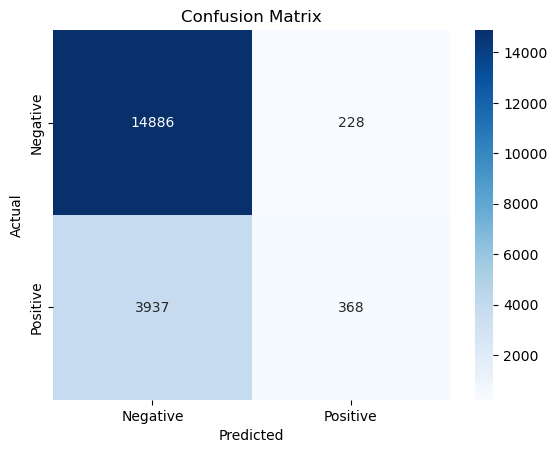

True Positives (TP): 368
True Negatives (TN): 14886


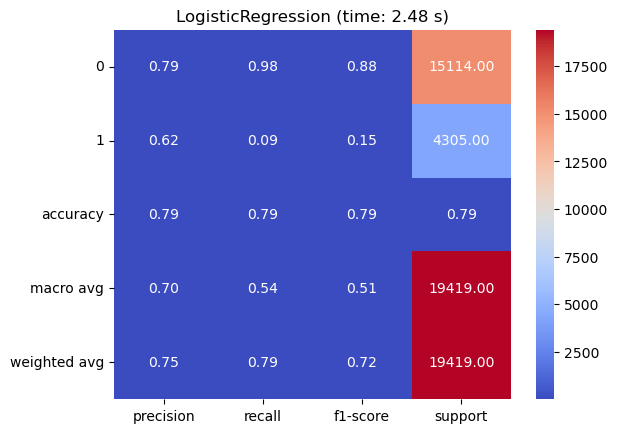

CPU times: total: 5.59 s
Wall time: 5.34 s


In [1]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time

start_time = time.time()
# Train a logistic regression classifier
classifier = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.savefig('LogisticRegression_Confusion_Matrix.jpg')  # Save the figure as classifiername.jpg
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"LogisticRegression (time: {wall_time:.2f} s)")
plt.savefig('LogisticRegression_classification_report_heatmap.jpg')  # Save the heatmap as classification_report_heatmap.jpg
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('LogisticRegression_classification_report.csv')

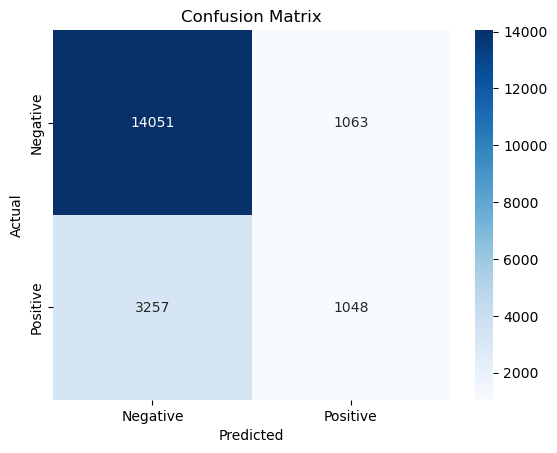

True Positives (TP): 1048
True Negatives (TN): 14051


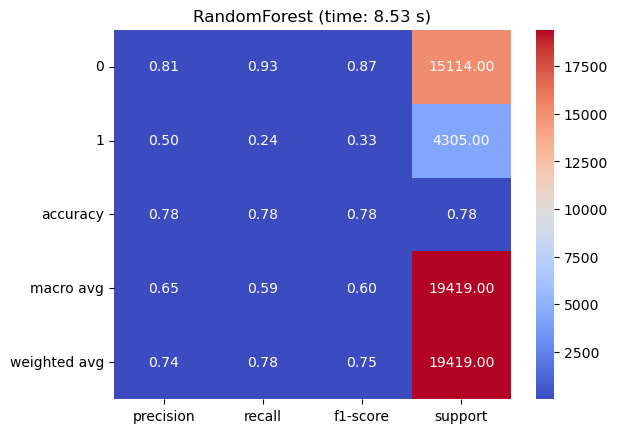

CPU times: total: 9.91 s
Wall time: 10.6 s


In [2]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)  # You can adjust the hyperparameters as needed
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.savefig('RandomForest_Confusion_Matrix.jpg')  # Save the figure as RandomForest_Confusion_Matrix.jpg
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (time: {wall_time:.2f} s)")
plt.savefig('RandomForest_classification_report_heatmap.jpg')  # Save the heatmap as RandomForest_classification_report_heatmap.jpg
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('RandomForest_classification_report.csv')


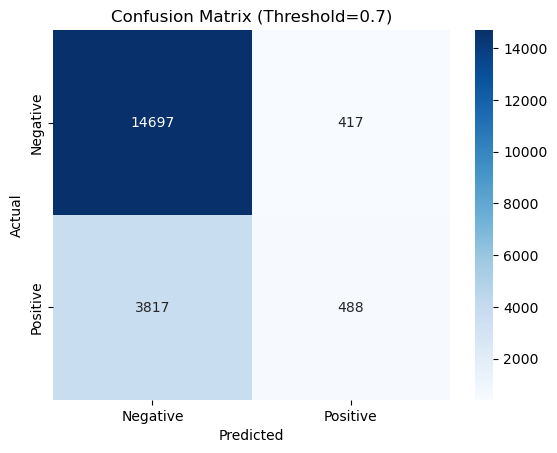

True Positives (TP): 488
True Negatives (TN): 14697


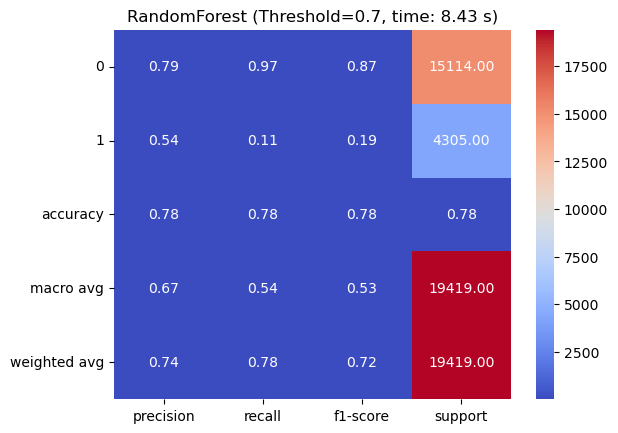

ROC-AUC Score: 0.70
CPU times: total: 9.53 s
Wall time: 9.55 s


In [4]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make probability predictions on the test set
y_prob = classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Define the threshold
threshold = 0.7  # You can adjust the threshold as needed

# Adjust predictions based on the threshold
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold={threshold})')
plt.savefig(f'RandomForest_Confusion_Matrix_Threshold_{threshold}.jpg')  # Save the figure with the threshold in the filename
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (Threshold={threshold}, time: {wall_time:.2f} s)")
plt.savefig(f'RandomForest_classification_report_heatmap_Threshold_{threshold}.jpg')  # Save the heatmap with the threshold in the filename
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv(f'RandomForest_classification_report_Threshold_{threshold}.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")


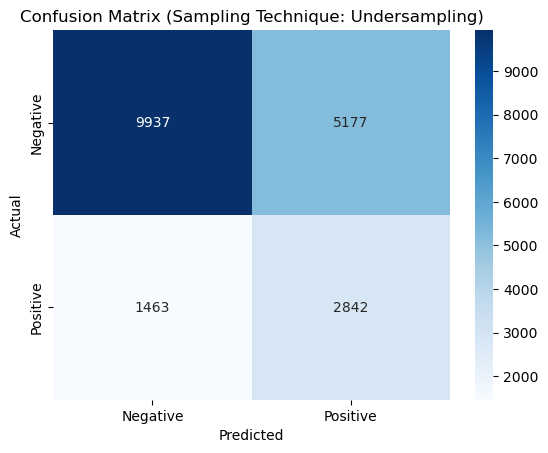

True Positives (TP): 2842
True Negatives (TN): 9937


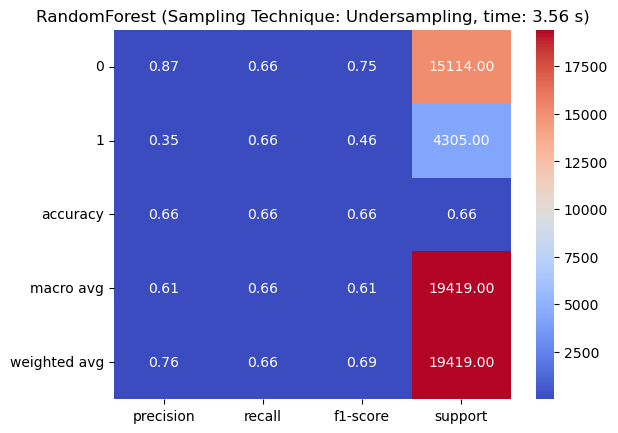

ROC-AUC Score: 0.71
CPU times: total: 5.23 s
Wall time: 6.34 s


In [5]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Apply oversampling or undersampling
# Uncomment the appropriate lines for the desired sampling technique
# oversampler = RandomOverSampler(sampling_strategy='minority')
undersampler = RandomUnderSampler(sampling_strategy='majority')

# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train_resampled, y_train_resampled)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Sampling Technique: Undersampling)')
plt.savefig('RandomForest_Confusion_Matrix_Undersampling.jpg')  # Save the figure with sampling technique info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (Sampling Technique: Undersampling, time: {wall_time:.2f} s)")
plt.savefig('RandomForest_classification_report_heatmap_Undersampling.jpg')  # Save the heatmap with sampling technique info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('RandomForest_classification_report_Undersampling.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


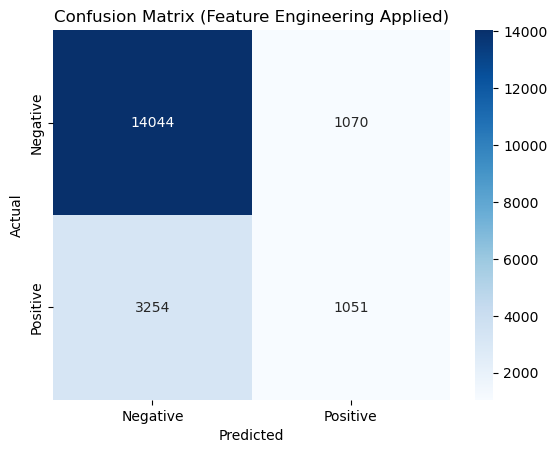

True Positives (TP): 1051
True Negatives (TN): 14044


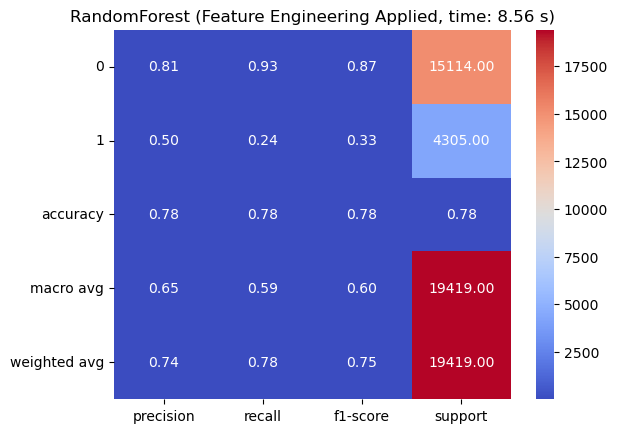

ROC-AUC Score: 0.70
CPU times: total: 10.1 s
Wall time: 10.1 s


In [8]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

# Perform feature engineering or transformations on the dataset
# For example, let's add a new feature 'feature_eng' as a combination of existing features
# Replace this with your specific feature engineering code
dataset['feature_eng'] = dataset['UL_UKL_FLG'] + dataset['ACC_TRANS_CNT']

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Feature Engineering Applied)')
plt.savefig('RandomForest_Confusion_Matrix_Feature_Engineering.jpg')  # Save the figure with feature engineering info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (Feature Engineering Applied, time: {wall_time:.2f} s)")
plt.savefig('RandomForest_classification_report_heatmap_Feature_Engineering.jpg')  # Save the heatmap with feature engineering info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('RandomForest_classification_report_Feature_Engineering.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


In [ ]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a dictionary to store the classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=0),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=0),
    'SVM': SVC(kernel='linear', probability=True, random_state=0)
}

results = {}

# Calculate wall time
start_time = time.time()

# Iterate through the classifiers and evaluate their performance
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    confusion_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()
    
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    
    # Store results
    results[clf_name] = {
        'confusion_matrix': confusion_mat,
        'True Positives (TP)': tp,
        'True Negatives (TN)': tn,
        'ROC-AUC Score': roc_auc
    }

end_time = time.time()
wall_time = end_time - start_time

# Print and compare results
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("True Positives (TP):", result['True Positives (TP)'])
    print("True Negatives (TN):", result['True Negatives (TN)'])
    print(f"ROC-AUC Score: {result['ROC-AUC Score']:.2f}")
    print("\n")

# Select the best classifier based on your evaluation criteria
best_classifier = max(results, key=lambda x: results[x]['ROC-AUC Score'])

print(f"The best classifier is: {best_classifier} (ROC-AUC Score: {results[best_classifier]['ROC-AUC Score']:.2f})")

# Visualize the confusion matrix of the best classifier
best_confusion_mat = results[best_classifier]['confusion_matrix']
labels = ['Negative', 'Positive']
sns.heatmap(best_confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix ({best_classifier} - Best Classifier)')
plt.savefig(f'BestClassifier_Confusion_Matrix.jpg')
plt.show()

# Visualize the classification report of the best classifier
best_y_pred = classifiers[best_classifier].predict(X_test)
best_classification_rep = classification_report(y_test, best_y_pred, output_dict=True)
df_best_classification_rep = pd.DataFrame(best_classification_rep).transpose()
sns.heatmap(df_best_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"{best_classifier} (time: {wall_time:.2f} s)")
plt.savefig(f'{best_classifier}_classification_report_heatmap.jpg')
plt.show()

# Save classification report of the best classifier as a .csv file
df_best_classification_rep.to_csv(f'{best_classifier}_classification_report.csv')


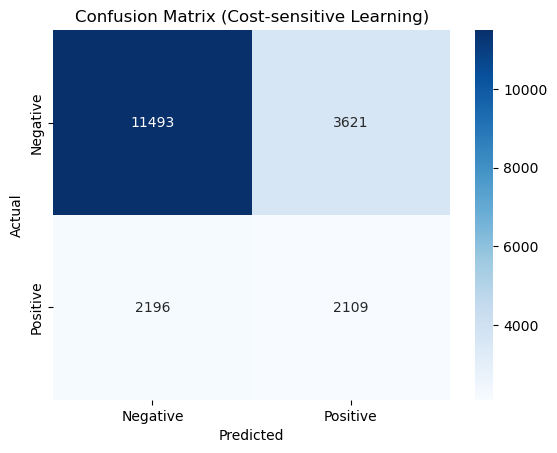

True Positives (TP): 2109
True Negatives (TN): 11493


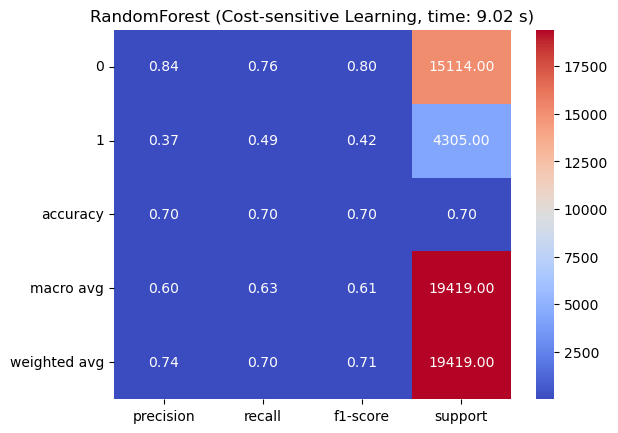

ROC-AUC Score: 0.68
CPU times: total: 12.5 s
Wall time: 12.8 s


In [1]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define class weights based on the cost associated with misclassification
class_weights = {0: 1, 1: 5}  # Adjust the weights based on your cost considerations

# Calculate wall time
start_time = time.time()

# Train a RandomForestClassifier with class weights
classifier = RandomForestClassifier(n_estimators=100, random_state=0, class_weight=class_weights)
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Cost-sensitive Learning)')
plt.savefig('RandomForest_Confusion_Matrix_Cost_Sensitive_Learning.jpg')  # Save the figure with cost-sensitive learning info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (Cost-sensitive Learning, time: {wall_time:.2f} s)")
plt.savefig('RandomForest_classification_report_heatmap_Cost_Sensitive_Learning.jpg')  # Save the heatmap with cost-sensitive learning info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('RandomForest_classification_report_Cost_Sensitive_Learning.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


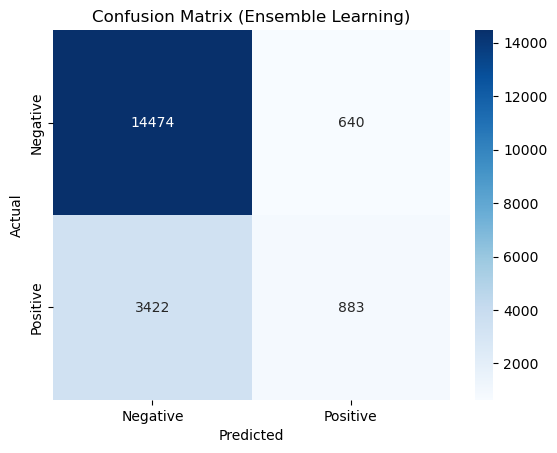

True Positives (TP): 883
True Negatives (TN): 14474


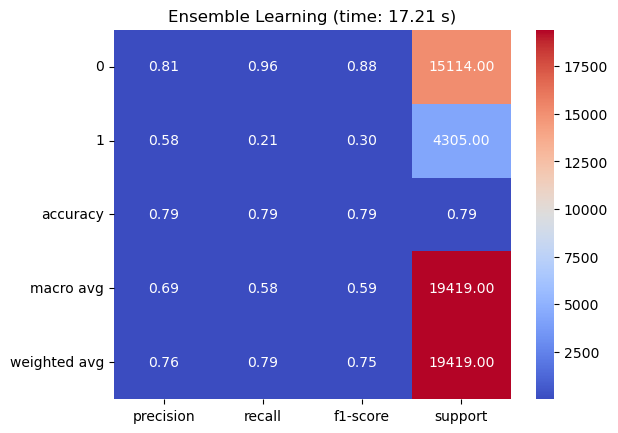

ROC-AUC Score: 0.73
CPU times: total: 18.8 s
Wall time: 18.9 s


In [2]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Define base classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=0)

# Create a VotingClassifier ensemble
ensemble_classifier = VotingClassifier(estimators=[
    ('RandomForest', rf_classifier),
    ('GradientBoosting', gb_classifier)
], voting='soft')  # 'soft' for probability-based voting

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = ensemble_classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Ensemble Learning)')
plt.savefig('Ensemble_Confusion_Matrix.jpg')  # Save the figure with ensemble learning info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Ensemble Learning (time: {wall_time:.2f} s)")
plt.savefig('Ensemble_classification_report_heatmap.jpg')  # Save the heatmap with ensemble learning info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('Ensemble_classification_report.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, ensemble_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


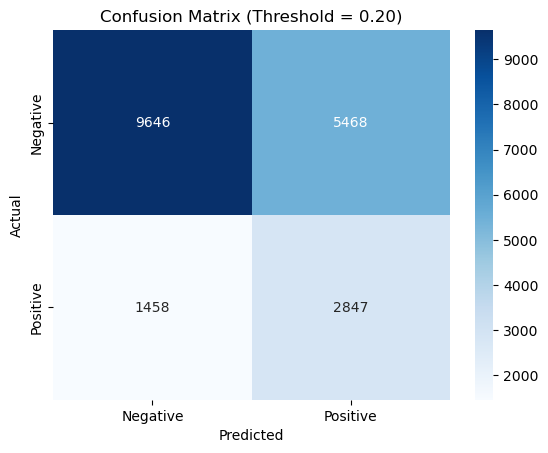

True Positives (TP): 2847
True Negatives (TN): 9646


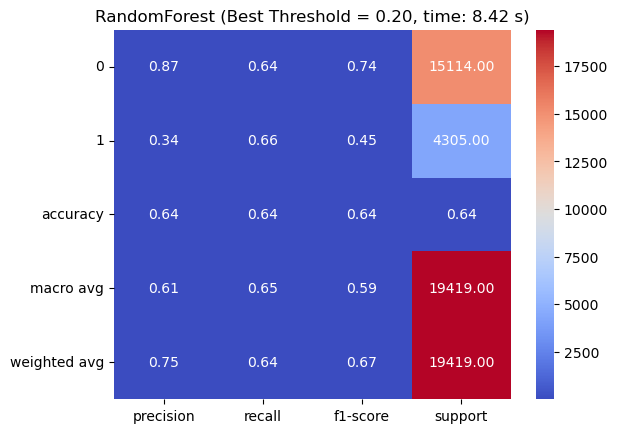

ROC-AUC Score (Best Threshold = 0.20): 0.65
CPU times: total: 9.67 s
Wall time: 9.71 s


In [3]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make probability predictions on the test set
y_prob = classifier.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Define a range of threshold values to evaluate
thresholds = np.linspace(0.1, 0.9, 9)  # Adjust the range as needed

best_f1_score = 0
best_threshold = 0

# Evaluate the model at different thresholds and select the best threshold
for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

# Apply the best threshold to make predictions
y_pred = (y_prob >= best_threshold).astype(int)

# Evaluate the model with the best threshold
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {best_threshold:.2f})')
plt.savefig(f'RandomForest_Confusion_Matrix_Best_Threshold.jpg')  # Save the figure with the best threshold info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (Best Threshold = {best_threshold:.2f}, time: {wall_time:.2f} s)")
plt.savefig(f'RandomForest_classification_report_heatmap_Best_Threshold.jpg')  # Save the heatmap with the best threshold info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv(f'RandomForest_classification_report_Best_Threshold_{best_threshold:.2f}.csv')

# Calculate ROC-AUC score with the best threshold
roc_auc = roc_auc_score(y_test, y_prob >= best_threshold)
print(f"ROC-AUC Score (Best Threshold = {best_threshold:.2f}): {roc_auc:.2f}")


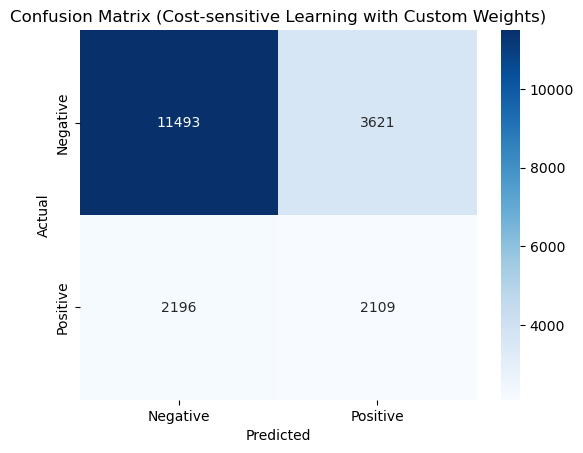

True Positives (TP): 2109
True Negatives (TN): 11493


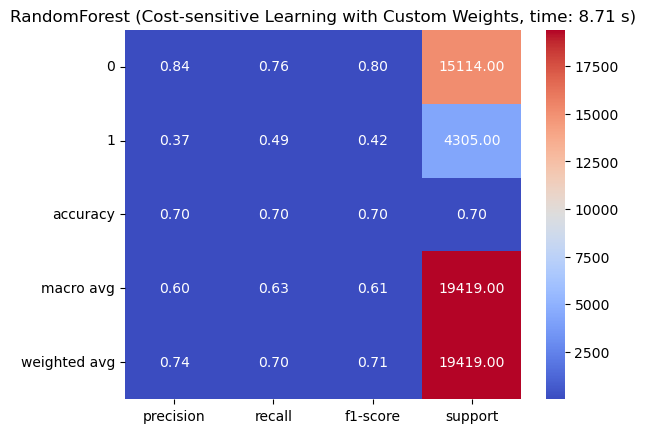

ROC-AUC Score: 0.68
CPU times: total: 10.2 s
Wall time: 10.3 s


In [4]:

%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define custom class weights based on your cost considerations
class_weights = {0: 1, 1: 5}  # Adjust the weights as needed

# Calculate wall time
start_time = time.time()

# Train a RandomForestClassifier with custom class weights
classifier = RandomForestClassifier(n_estimators=100, random_state=0, class_weight=class_weights)
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Cost-sensitive Learning with Custom Weights)')
plt.savefig('RandomForest_Confusion_Matrix_Custom_Weights.jpg')  # Save the figure with custom weights info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (Cost-sensitive Learning with Custom Weights, time: {wall_time:.2f} s)")
plt.savefig('RandomForest_classification_report_heatmap_Custom_Weights.jpg')  # Save the heatmap with custom weights info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('RandomForest_classification_report_Custom_Weights.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


In [5]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Initialize a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Perform Recursive Feature Elimination (RFE)
n_features_to_select = 10  # Adjust the number of features to select as needed
rfe = RFE(estimator=classifier, n_features_to_select=n_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Train the classifier with selected features
classifier.fit(X_train_rfe, y_train)

# Transform the test set with the selected features
X_test_rfe = rfe.transform(X_test)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test_rfe)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Feature Selection with RFE)')
plt.savefig('RandomForest_Confusion_Matrix_Feature_Selection_RFE.jpg')  # Save the figure with feature selection info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (Feature Selection with RFE, time: {wall_time:.2f} s)")
plt.savefig('RandomForest_classification_report_heatmap_Feature_Selection_RFE.jpg')  # Save the heatmap with feature selection info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('RandomForest_classification_report_Feature_Selection_RFE.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test_rfe)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")



KeyboardInterrupt



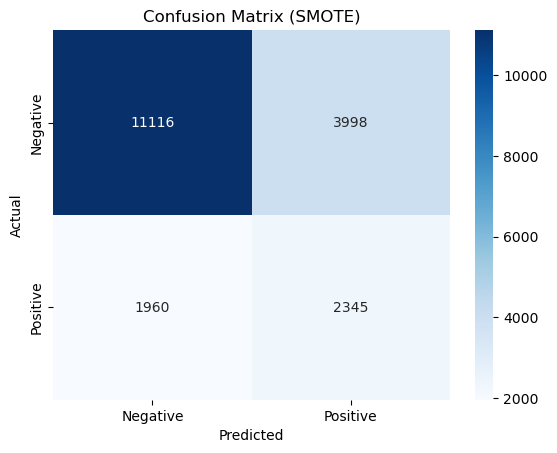

True Positives (TP): 2345
True Negatives (TN): 11116


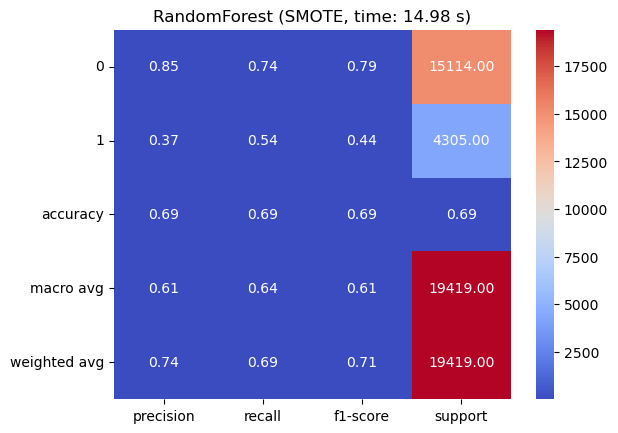

ROC-AUC Score: 0.69
CPU times: total: 27.5 s
Wall time: 24.9 s


In [1]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Calculate wall time
start_time = time.time()

# Train a RandomForestClassifier on the resampled data
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train_resampled, y_train_resampled)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (SMOTE)')
plt.savefig('RandomForest_Confusion_Matrix_SMOTE.jpg')  # Save the figure with SMOTE info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (SMOTE, time: {wall_time:.2f} s)")
plt.savefig('RandomForest_classification_report_heatmap_SMOTE.jpg')  # Save the heatmap with SMOTE info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('RandomForest_classification_report_SMOTE.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


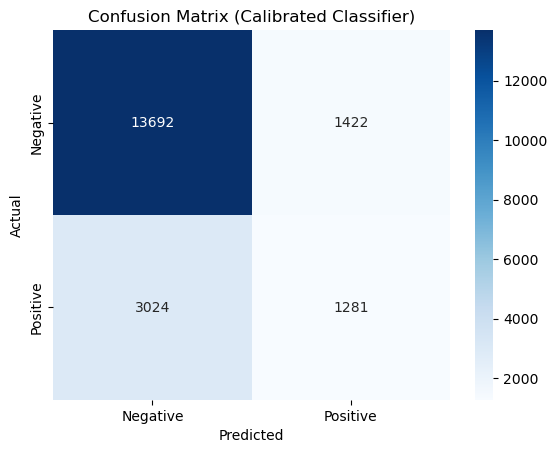

True Positives (TP): 1281
True Negatives (TN): 13692


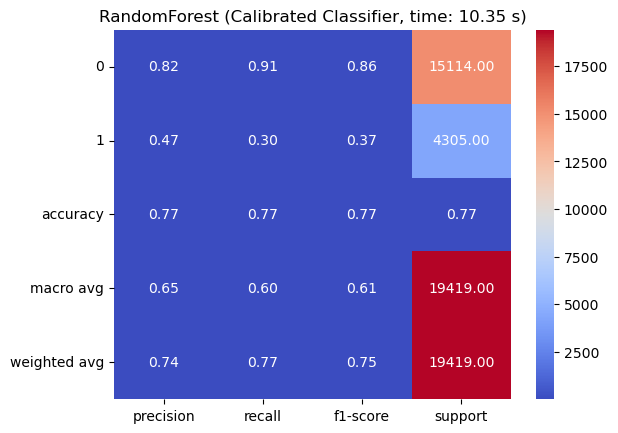

ROC-AUC Score: 0.70
CPU times: total: 12.4 s
Wall time: 11.5 s


In [3]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Initialize a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
classifier.fit(X_train, y_train)

# Wrap the classifier in a CalibratedClassifierCV to enable calibration
calibrated_classifier = CalibratedClassifierCV(classifier, method='sigmoid', cv='prefit')  # You can choose the calibration method

# Fit the calibrated classifier
calibrated_classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make probability predictions on the test set
y_prob = calibrated_classifier.predict_proba(X_test)[:, 1]

# Define a threshold for binary classification (e.g., 0.5)
threshold = 0.5

# Apply the threshold to make binary predictions
y_pred = (y_prob >= threshold).astype(int)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Calibrated Classifier)')
plt.savefig('RandomForest_Confusion_Matrix_Calibrated.jpg')  # Save the figure with calibration info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (Calibrated Classifier, time: {wall_time:.2f} s)")
plt.savefig('RandomForest_classification_report_heatmap_Calibrated.jpg')  # Save the heatmap with calibration info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('RandomForest_classification_report_Calibrated.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")


Iteration 1: True Positives (TP): 1042, True Negatives (TN): 14038
Iteration 2: True Positives (TP): 1070, True Negatives (TN): 14059
Iteration 3: True Positives (TP): 1036, True Negatives (TN): 14041
Iteration 4: True Positives (TP): 1030, True Negatives (TN): 14068
Iteration 5: True Positives (TP): 1045, True Negatives (TN): 14058


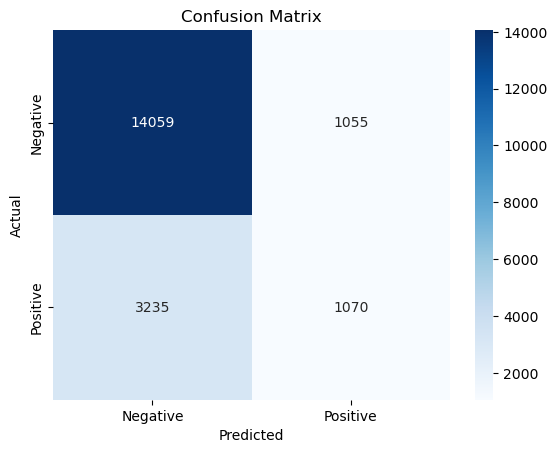

Best True Positives (TP): 1070
Best True Negatives (TN): 14059


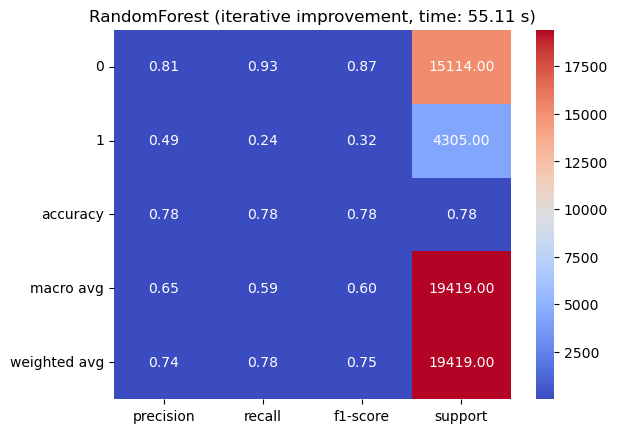

ROC-AUC Score: 0.70
CPU times: total: 56.3 s
Wall time: 56.3 s


In [4]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()
# Train the initial classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the initial model
confusion_mat = confusion_matrix(y_test, y_pred)

# Perform error analysis and iterative improvement
improvement_iterations = 5  # Number of iterations for iterative improvement
best_classifier = None
best_confusion_mat = None
best_tn = 0
best_tp = 0

for i in range(improvement_iterations):
    # Analyze the errors
    tn, fp, fn, tp = confusion_mat.ravel()
    print(f"Iteration {i+1}: True Positives (TP): {tp}, True Negatives (TN): {tn}")

    # Identify patterns in the errors and refine the model
    # Implement your error analysis and model refinement steps here

    # Train the refined model
    classifier.fit(X_train, y_train)

    # Make predictions on the test set with the refined model
    y_pred = classifier.predict(X_test)

    # Evaluate the refined model
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Update the best model if the TN and TP metrics improve
    new_tn, new_fp, new_fn, new_tp = confusion_mat.ravel()
    if new_tn + new_tp > best_tn + best_tp:
        best_tn = new_tn
        best_tp = new_tp
        best_classifier = classifier
        best_confusion_mat = confusion_mat

end_time = time.time()
wall_time = end_time - start_time

# Visualize the best confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(best_confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the best True Positive (TP) and True Negative (TN) metrics
print("Best True Positives (TP):", best_tp)
print("Best True Negatives (TN):", best_tn)

# Print the classification report for the best model
y_pred_best = best_classifier.predict(X_test)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred_best, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (iterative improvement, time: {wall_time:.2f} s)")
plt.savefig('RandomForest_classification_report_heatmap_iterative.jpg')  # Save the heatmap with calibration info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('RandomForest_classification_report_iterative.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")


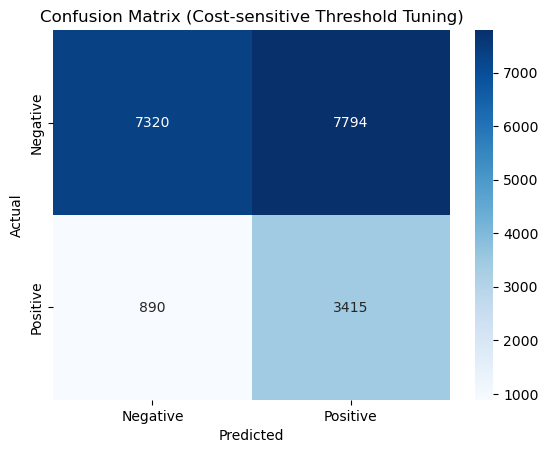

True Positives (TP): 3415
True Negatives (TN): 7320


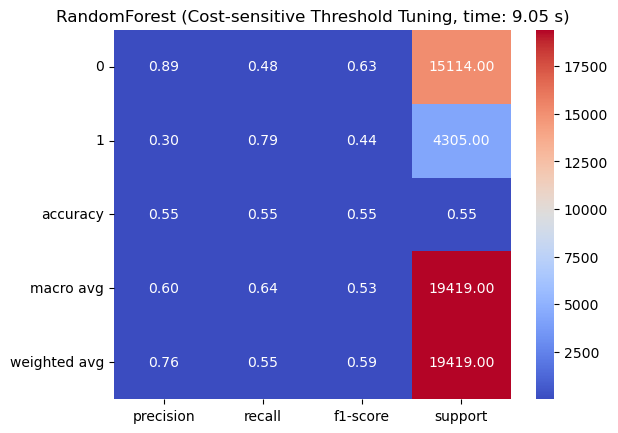

ROC-AUC Score (Cost-sensitive Threshold Tuning): 0.70
CPU times: total: 10.5 s
Wall time: 10.6 s


In [5]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Initialize a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make probability predictions on the test set
y_prob = classifier.predict_proba(X_test)[:, 1]

# Cost-sensitive threshold tuning
thresholds = np.linspace(0, 1, 100)  # Adjust the number of threshold values as needed
min_cost = float('inf')
best_threshold = 0.5  # Default threshold

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    
    # Define misclassification costs (adjust as needed)
    false_positive_cost = 1  # Cost of false positive
    false_negative_cost = 5  # Cost of false negative
    
    # Calculate the total cost based on misclassification
    total_cost = (false_positive_cost * confusion_matrix(y_test, y_pred)[0, 1] +
                  false_negative_cost * confusion_matrix(y_test, y_pred)[1, 0])
    
    # Update the best threshold if the cost is lower
    if total_cost < min_cost:
        min_cost = total_cost
        best_threshold = threshold

# Apply the best threshold to make binary predictions
y_pred = (y_prob >= best_threshold).astype(int)

# Evaluate the model with the best threshold
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Cost-sensitive Threshold Tuning)')
plt.savefig('RandomForest_Confusion_Matrix_CostSensitive.jpg')  # Save the figure with cost-sensitive info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"RandomForest (Cost-sensitive Threshold Tuning, time: {wall_time:.2f} s)")
plt.savefig('RandomForest_classification_report_heatmap_CostSensitive.jpg')  # Save the heatmap with cost-sensitive info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('RandomForest_classification_report_CostSensitive.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score (Cost-sensitive Threshold Tuning): {roc_auc:.2f}")


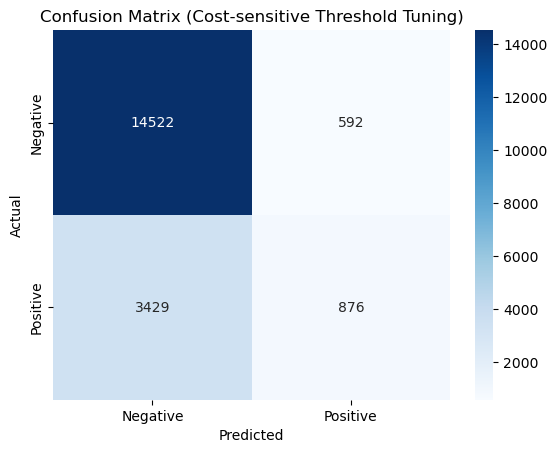

True Positives (TP): 3415
True Negatives (TN): 7320


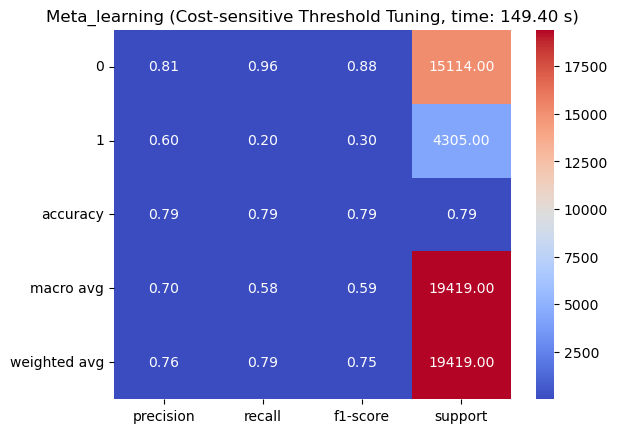

ROC-AUC Score (Meta_learning): 0.70
CPU times: total: 2min 30s
Wall time: 2min 30s


In [8]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

start_time = time.time()
# Define the base models
base_models = [
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier()
]

# Define the meta-model
meta_model = LogisticRegression()

# Perform stacking
stacking_train = np.zeros((X_train.shape[0], len(base_models)))  # Initialize the stacking training set
stacking_test = np.zeros((X_test.shape[0], len(base_models)))  # Initialize the stacking test set

kf = KFold(n_splits=5)  # Use k-fold cross-validation
for i, model in enumerate(base_models):
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model.fit(X_train_fold, y_train_fold)
        stacking_train[val_index, i] = model.predict_proba(X_val_fold)[:, 1]
    
    model.fit(X_train, y_train)  # Fit the model on the full training set
    stacking_test[:, i] = model.predict_proba(X_test)[:, 1]

# Train the meta-model on the stacking training set
meta_model.fit(stacking_train, y_train)

# Make predictions on the test set using the meta-model

y_pred = meta_model.predict(stacking_test)
end_time = time.time()
wall_time = end_time - start_time

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Cost-sensitive Threshold Tuning)')
plt.savefig('Meta_learning_Confusion_Matrix_CostSensitive.jpg')  # Save the figure with cost-sensitive info
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report as a colorful heatmap
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()

sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Meta_learning (Cost-sensitive Threshold Tuning, time: {wall_time:.2f} s)")
plt.savefig('Meta_learning_classification_report_heatmap.jpg')  # Save the heatmap with cost-sensitive info
plt.show()

# Save classification report as a .csv file
df_classification_rep.to_csv('Meta_learning_classification_report.csv')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score (Meta_learning): {roc_auc:.2f}")


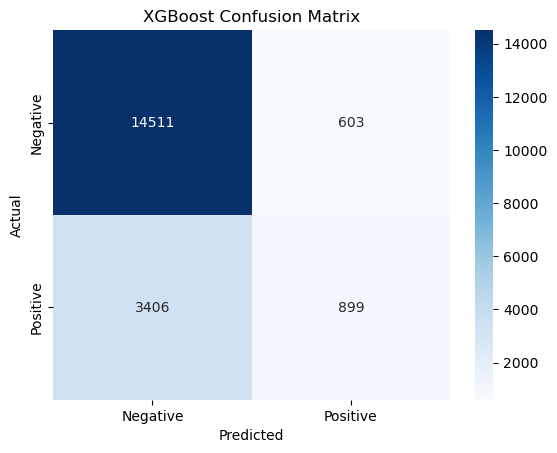

True Positives (TP): 899
True Negatives (TN): 14511
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15114
           1       0.60      0.21      0.31      4305

    accuracy                           0.79     19419
   macro avg       0.70      0.58      0.59     19419
weighted avg       0.76      0.79      0.75     19419



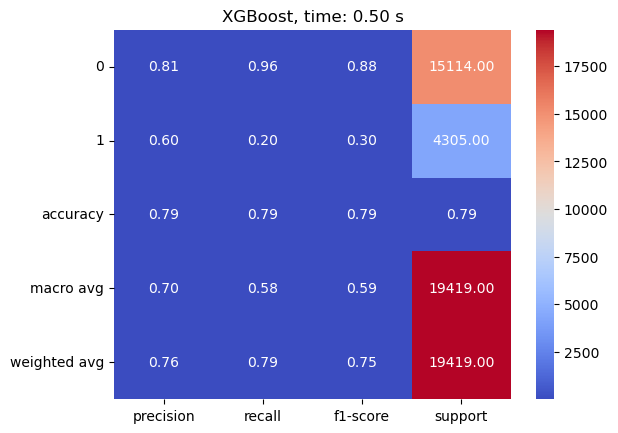

Wall Time: 0.50 seconds
CPU times: total: 5.27 s
Wall time: 1.34 s


In [12]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train the XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.savefig('XGBoost_Confusion_Matrix.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('xgboost_classification_report.csv')

# Convert classification report to a heatmap
classification_rep_df = classification_rep_df.drop(['accuracy', 'macro avg', 'weighted avg'])
sns.heatmap(df_classification_rep , annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"XGBoost, time: {wall_time:.2f} s")
plt.savefig('XGBoost_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


[LightGBM] [Info] Number of positive: 16938, number of negative: 60737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1902
[LightGBM] [Info] Number of data points in the train set: 77675, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218062 -> initscore=-1.276993
[LightGBM] [Info] Start training from score -1.276993


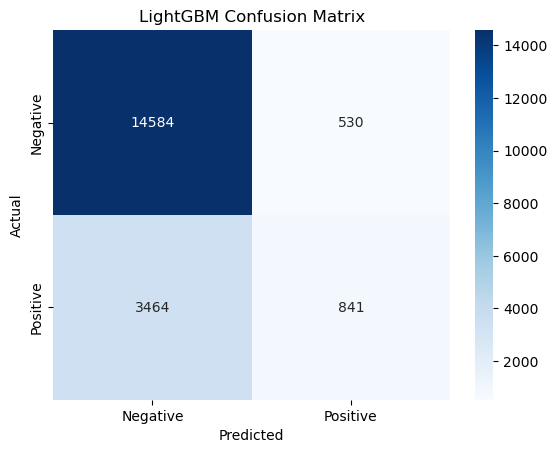

True Positives (TP): 841
True Negatives (TN): 14584
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15114
           1       0.61      0.20      0.30      4305

    accuracy                           0.79     19419
   macro avg       0.71      0.58      0.59     19419
weighted avg       0.76      0.79      0.75     19419



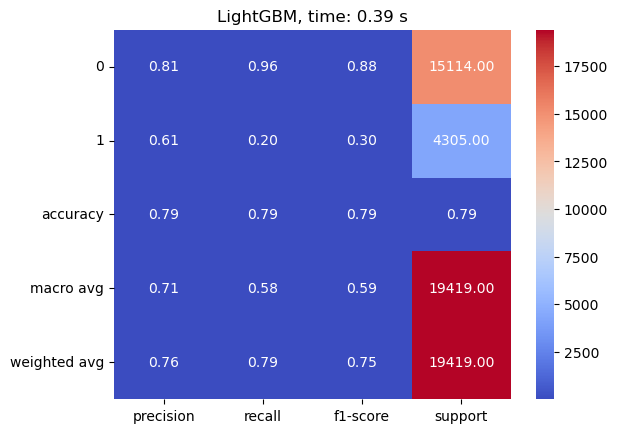

Wall Time: 0.39 seconds
CPU times: total: 4.52 s
Wall time: 1.38 s


In [15]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train the LightGBM classifier
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LightGBM Confusion Matrix')
plt.savefig('LightGBM_Confusion_Matrix.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('lightgbm_classification_report.csv')

# Convert classification report to a heatmap
classification_rep_df = classification_rep_df#.drop(['accuracy', 'macro avg', 'weighted avg'])
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"LightGBM, time: {wall_time:.2f} s")
plt.savefig('LightGBM_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


Learning rate set to 0.066082
0:	learn: 0.6617019	total: 12.4ms	remaining: 12.4s
1:	learn: 0.6350628	total: 23.8ms	remaining: 11.9s
2:	learn: 0.6103283	total: 36.3ms	remaining: 12s
3:	learn: 0.5892500	total: 48.2ms	remaining: 12s
4:	learn: 0.5740973	total: 60ms	remaining: 11.9s
5:	learn: 0.5597978	total: 72.2ms	remaining: 12s
6:	learn: 0.5474710	total: 82.9ms	remaining: 11.8s
7:	learn: 0.5366201	total: 94.5ms	remaining: 11.7s
8:	learn: 0.5267213	total: 105ms	remaining: 11.6s
9:	learn: 0.5180176	total: 117ms	remaining: 11.6s
10:	learn: 0.5118383	total: 127ms	remaining: 11.4s
11:	learn: 0.5061542	total: 138ms	remaining: 11.4s
12:	learn: 0.5006964	total: 148ms	remaining: 11.3s
13:	learn: 0.4954475	total: 160ms	remaining: 11.2s
14:	learn: 0.4917357	total: 170ms	remaining: 11.2s
15:	learn: 0.4883537	total: 182ms	remaining: 11.2s
16:	learn: 0.4851375	total: 193ms	remaining: 11.1s
17:	learn: 0.4819280	total: 206ms	remaining: 11.3s
18:	learn: 0.4797096	total: 219ms	remaining: 11.3s
19:	learn: 

174:	learn: 0.4506236	total: 2.02s	remaining: 9.55s
175:	learn: 0.4506032	total: 2.04s	remaining: 9.53s
176:	learn: 0.4505965	total: 2.05s	remaining: 9.52s
177:	learn: 0.4505949	total: 2.06s	remaining: 9.5s
178:	learn: 0.4505196	total: 2.07s	remaining: 9.49s
179:	learn: 0.4504783	total: 2.08s	remaining: 9.48s
180:	learn: 0.4504546	total: 2.09s	remaining: 9.46s
181:	learn: 0.4504236	total: 2.1s	remaining: 9.44s
182:	learn: 0.4503648	total: 2.11s	remaining: 9.43s
183:	learn: 0.4503158	total: 2.12s	remaining: 9.41s
184:	learn: 0.4502259	total: 2.13s	remaining: 9.4s
185:	learn: 0.4502172	total: 2.14s	remaining: 9.38s
186:	learn: 0.4502099	total: 2.15s	remaining: 9.36s
187:	learn: 0.4501354	total: 2.16s	remaining: 9.35s
188:	learn: 0.4501309	total: 2.17s	remaining: 9.33s
189:	learn: 0.4501292	total: 2.18s	remaining: 9.31s
190:	learn: 0.4501134	total: 2.19s	remaining: 9.29s
191:	learn: 0.4500677	total: 2.2s	remaining: 9.28s
192:	learn: 0.4500640	total: 2.21s	remaining: 9.26s
193:	learn: 0.45

341:	learn: 0.4454652	total: 3.85s	remaining: 7.4s
342:	learn: 0.4454335	total: 3.86s	remaining: 7.39s
343:	learn: 0.4454150	total: 3.87s	remaining: 7.38s
344:	learn: 0.4453595	total: 3.88s	remaining: 7.37s
345:	learn: 0.4453578	total: 3.89s	remaining: 7.36s
346:	learn: 0.4453277	total: 3.9s	remaining: 7.34s
347:	learn: 0.4452779	total: 3.91s	remaining: 7.33s
348:	learn: 0.4452679	total: 3.92s	remaining: 7.32s
349:	learn: 0.4452170	total: 3.94s	remaining: 7.31s
350:	learn: 0.4451816	total: 3.94s	remaining: 7.29s
351:	learn: 0.4451519	total: 3.96s	remaining: 7.28s
352:	learn: 0.4451079	total: 3.97s	remaining: 7.27s
353:	learn: 0.4450662	total: 3.98s	remaining: 7.26s
354:	learn: 0.4450228	total: 3.99s	remaining: 7.25s
355:	learn: 0.4449807	total: 4s	remaining: 7.23s
356:	learn: 0.4449800	total: 4.01s	remaining: 7.22s
357:	learn: 0.4449576	total: 4.02s	remaining: 7.21s
358:	learn: 0.4449119	total: 4.03s	remaining: 7.19s
359:	learn: 0.4449112	total: 4.04s	remaining: 7.18s
360:	learn: 0.444

509:	learn: 0.4411970	total: 5.67s	remaining: 5.45s
510:	learn: 0.4411649	total: 5.69s	remaining: 5.44s
511:	learn: 0.4411251	total: 5.7s	remaining: 5.43s
512:	learn: 0.4411012	total: 5.71s	remaining: 5.42s
513:	learn: 0.4410900	total: 5.72s	remaining: 5.41s
514:	learn: 0.4410839	total: 5.73s	remaining: 5.39s
515:	learn: 0.4410674	total: 5.74s	remaining: 5.38s
516:	learn: 0.4410475	total: 5.75s	remaining: 5.37s
517:	learn: 0.4410397	total: 5.76s	remaining: 5.36s
518:	learn: 0.4410394	total: 5.77s	remaining: 5.34s
519:	learn: 0.4410236	total: 5.78s	remaining: 5.33s
520:	learn: 0.4410214	total: 5.79s	remaining: 5.32s
521:	learn: 0.4410186	total: 5.8s	remaining: 5.31s
522:	learn: 0.4409650	total: 5.81s	remaining: 5.3s
523:	learn: 0.4409340	total: 5.82s	remaining: 5.29s
524:	learn: 0.4409238	total: 5.83s	remaining: 5.27s
525:	learn: 0.4408740	total: 5.84s	remaining: 5.26s
526:	learn: 0.4408738	total: 5.85s	remaining: 5.25s
527:	learn: 0.4408737	total: 5.86s	remaining: 5.24s
528:	learn: 0.4

677:	learn: 0.4380782	total: 7.48s	remaining: 3.55s
678:	learn: 0.4380752	total: 7.49s	remaining: 3.54s
679:	learn: 0.4380546	total: 7.5s	remaining: 3.53s
680:	learn: 0.4380276	total: 7.51s	remaining: 3.52s
681:	learn: 0.4380044	total: 7.52s	remaining: 3.51s
682:	learn: 0.4379826	total: 7.53s	remaining: 3.5s
683:	learn: 0.4379599	total: 7.55s	remaining: 3.49s
684:	learn: 0.4379523	total: 7.56s	remaining: 3.48s
685:	learn: 0.4379476	total: 7.57s	remaining: 3.46s
686:	learn: 0.4379322	total: 7.58s	remaining: 3.45s
687:	learn: 0.4379050	total: 7.59s	remaining: 3.44s
688:	learn: 0.4378937	total: 7.6s	remaining: 3.43s
689:	learn: 0.4378903	total: 7.61s	remaining: 3.42s
690:	learn: 0.4378694	total: 7.62s	remaining: 3.41s
691:	learn: 0.4378626	total: 7.63s	remaining: 3.4s
692:	learn: 0.4378624	total: 7.64s	remaining: 3.38s
693:	learn: 0.4378452	total: 7.65s	remaining: 3.37s
694:	learn: 0.4378361	total: 7.66s	remaining: 3.36s
695:	learn: 0.4378179	total: 7.67s	remaining: 3.35s
696:	learn: 0.43

845:	learn: 0.4348178	total: 9.3s	remaining: 1.69s
846:	learn: 0.4347972	total: 9.31s	remaining: 1.68s
847:	learn: 0.4347819	total: 9.32s	remaining: 1.67s
848:	learn: 0.4347772	total: 9.33s	remaining: 1.66s
849:	learn: 0.4347747	total: 9.34s	remaining: 1.65s
850:	learn: 0.4347659	total: 9.35s	remaining: 1.64s
851:	learn: 0.4347404	total: 9.36s	remaining: 1.63s
852:	learn: 0.4347394	total: 9.37s	remaining: 1.61s
853:	learn: 0.4347232	total: 9.38s	remaining: 1.6s
854:	learn: 0.4347061	total: 9.39s	remaining: 1.59s
855:	learn: 0.4347056	total: 9.4s	remaining: 1.58s
856:	learn: 0.4347011	total: 9.42s	remaining: 1.57s
857:	learn: 0.4346727	total: 9.43s	remaining: 1.56s
858:	learn: 0.4346665	total: 9.44s	remaining: 1.55s
859:	learn: 0.4346663	total: 9.45s	remaining: 1.54s
860:	learn: 0.4346469	total: 9.46s	remaining: 1.53s
861:	learn: 0.4346218	total: 9.47s	remaining: 1.51s
862:	learn: 0.4346108	total: 9.48s	remaining: 1.5s
863:	learn: 0.4346037	total: 9.49s	remaining: 1.49s
864:	learn: 0.43

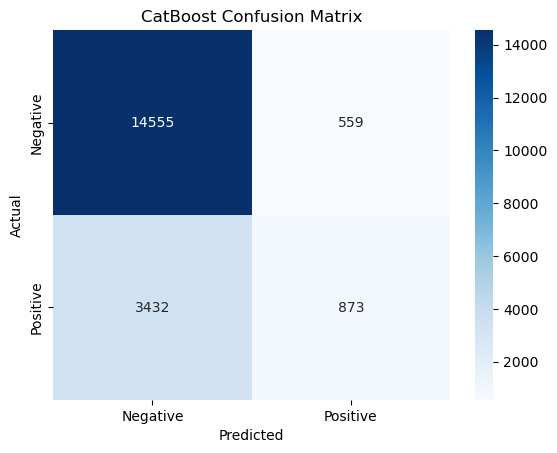

True Positives (TP): 873
True Negatives (TN): 14555
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15114
           1       0.61      0.20      0.30      4305

    accuracy                           0.79     19419
   macro avg       0.71      0.58      0.59     19419
weighted avg       0.76      0.79      0.75     19419



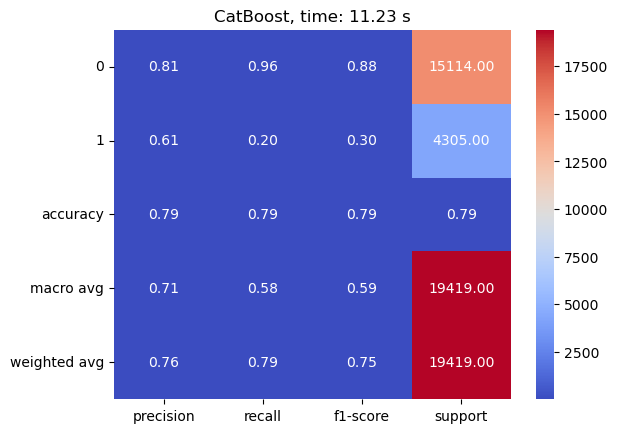

Wall Time: 11.23 seconds
CPU times: total: 1min 21s
Wall time: 12 s


In [17]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train the CatBoost classifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.savefig('CatBoost_Confusion_Matrix.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('catboost_classification_report.csv')

sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"CatBoost, time: {wall_time:.2f} s")
plt.savefig('CatBoost_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


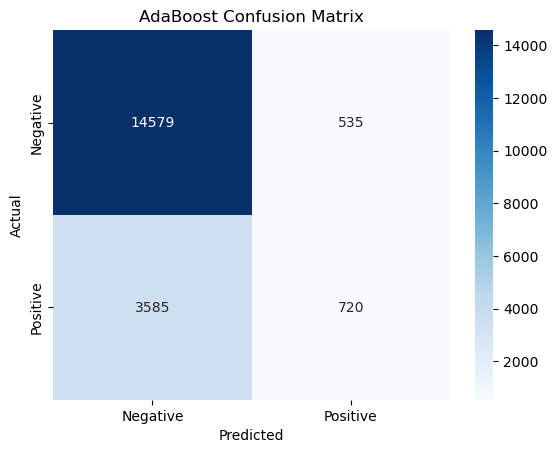

True Positives (TP): 720
True Negatives (TN): 14579
              precision    recall  f1-score   support

           0       0.80      0.96      0.88     15114
           1       0.57      0.17      0.26      4305

    accuracy                           0.79     19419
   macro avg       0.69      0.57      0.57     19419
weighted avg       0.75      0.79      0.74     19419



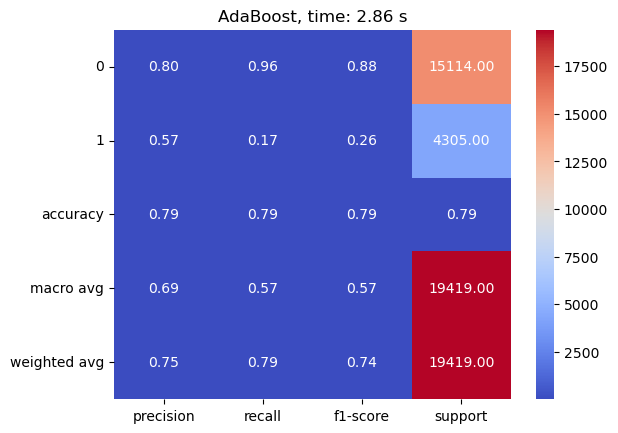

Wall Time: 2.86 seconds
CPU times: total: 3.81 s
Wall time: 3.81 s


In [18]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train the AdaBoost classifier
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AdaBoost Confusion Matrix')
plt.savefig('AdaBoost_Confusion_Matrix.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('adaboost_classification_report.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"AdaBoost, time: {wall_time:.2f} s")
plt.savefig('AdaBoost_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


D:\Users\ivan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


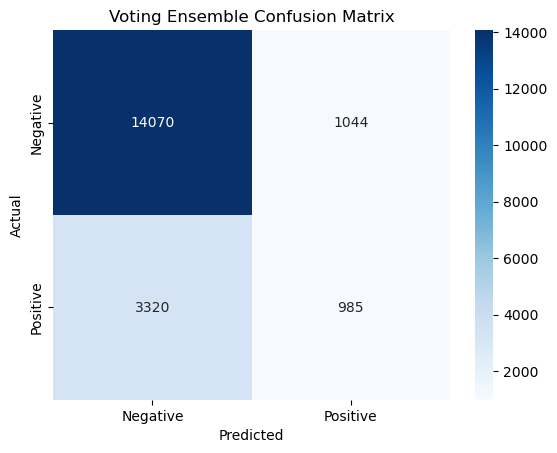

True Positives (TP): 985
True Negatives (TN): 14070
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     15114
           1       0.49      0.23      0.31      4305

    accuracy                           0.78     19419
   macro avg       0.65      0.58      0.59     19419
weighted avg       0.74      0.78      0.74     19419



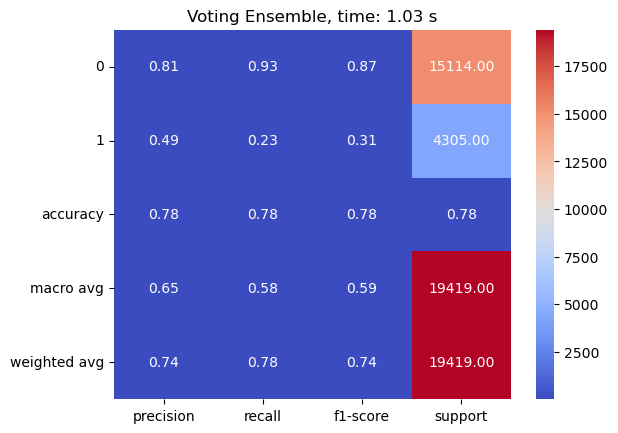

Wall Time: 1.03 seconds
CPU times: total: 45.8 s
Wall time: 31.1 s


In [22]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Define individual classifiers (replace these with your specific classifiers)

model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()


# Create a VotingClassifier with the individual classifiers
voting_classifier = VotingClassifier(estimators=[
    ('classifier1', model1),
    ('classifier2', model2),
    ('classifier3', model3)
], voting='soft')  # Change 'voting' to 'hard' for hard voting

# Train the VotingClassifier
voting_classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Voting Ensemble Confusion Matrix')
plt.savefig('Voting_Ensemble_Confusion_Matrix.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('voting_ensemble_classification_report.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Voting Ensemble, time: {wall_time:.2f} s")
plt.savefig('Voting_Ensemble_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


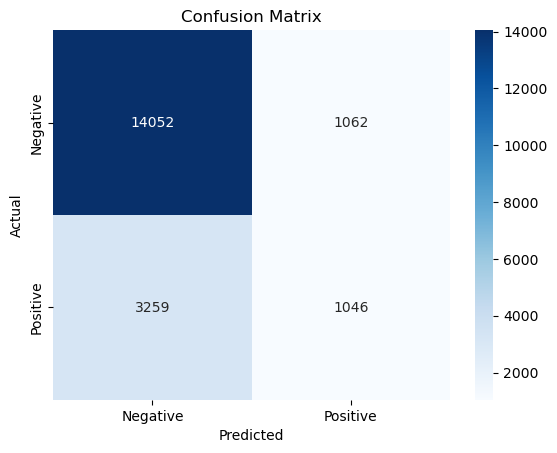

True Positives (TP): 1046
True Negatives (TN): 14052
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     15114
           1       0.50      0.24      0.33      4305

    accuracy                           0.78     19419
   macro avg       0.65      0.59      0.60     19419
weighted avg       0.74      0.78      0.75     19419



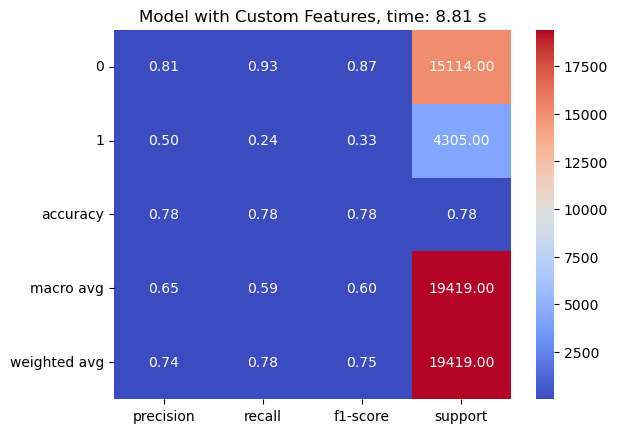

Wall Time: 8.81 seconds
CPU times: total: 9.95 s
Wall time: 9.99 s


In [23]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Perform domain-specific feature engineering here
# Add your custom feature engineering code to create new features

# For example, you can create a new feature based on domain knowledge:
# dataset['custom_feature'] = dataset['feature1'] * dataset['feature2']

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train your chosen classifier
classifier = RandomForestClassifier()  # Replace with your chosen classifier
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Model with Custom Features, time: {wall_time:.2f} s")
plt.savefig('Custom_Features_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


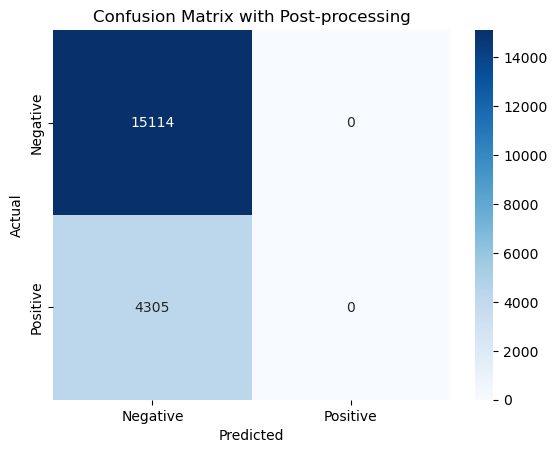

True Positives (TP): 0
True Negatives (TN): 15114
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15114
           1       0.00      0.00      0.00      4305

    accuracy                           0.78     19419
   macro avg       0.39      0.50      0.44     19419
weighted avg       0.61      0.78      0.68     19419



D:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\

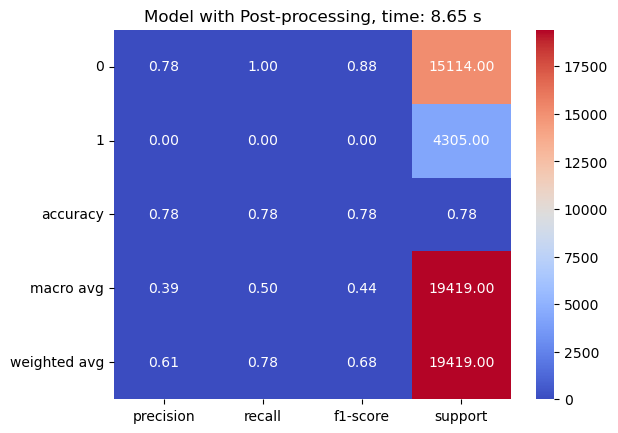

Wall Time: 8.65 seconds
CPU times: total: 9.88 s
Wall time: 9.91 s


In [27]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train your chosen classifier
classifier = RandomForestClassifier()  # Replace with your chosen classifier
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

def rule_based_post_processing(predictions):
    # Apply domain-specific rules to refine the predictions
    post_processed_predictions = []
    for pred in predictions:
        # Apply your rules here
        if pred == 1:
            # Apply a rule for positive class
            # Example rule: If a certain condition is met, change the prediction to negative class (0)
            if pred > 0.5:  # Placeholder condition, replace it with your domain-specific condition
                pred = 0
        post_processed_predictions.append(pred)
    
    return post_processed_predictions

y_pred_post_processed = rule_based_post_processing(y_pred)

# Evaluate the model with adjusted predictions
confusion_mat = confusion_matrix(y_test, y_pred_post_processed)  # Use adjusted predictions

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Post-processing')
plt.savefig('Confusion_Matrix_Post-processing.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred_post_processed)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred_post_processed, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_with_post-processing.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Model with Post-processing, time: {wall_time:.2f} s")
plt.savefig('Post-processing_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


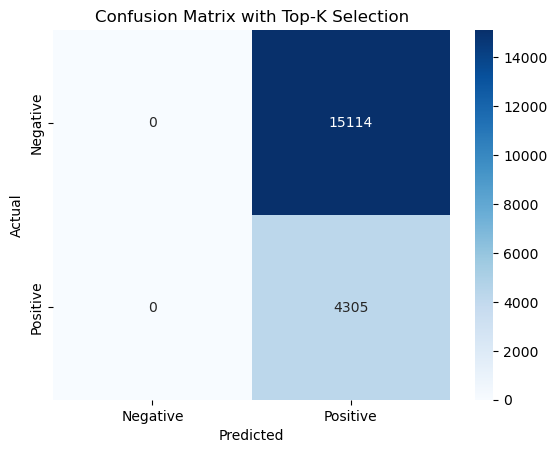

True Positives (TP): 4305
True Negatives (TN): 0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     15114
           1       0.22      1.00      0.36      4305

    accuracy                           0.22     19419
   macro avg       0.11      0.50      0.18     19419
weighted avg       0.05      0.22      0.08     19419



D:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda3\lib\site-packages\sklearn\metrics\

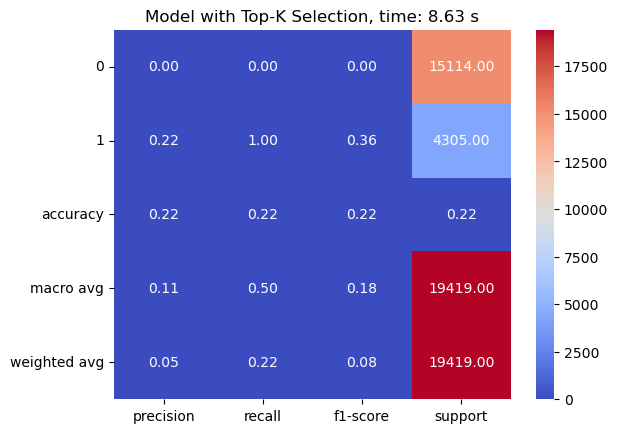

Wall Time: 8.63 seconds
CPU times: total: 9.95 s
Wall time: 9.97 s


In [28]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train your chosen classifier
classifier = RandomForestClassifier()  # Replace with your chosen classifier
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred_prob = classifier.predict_proba(X_test)  # Get class probabilities

# Define the value of K for Top-K selection
k = 5  # Adjust K as needed

# Select the top-K predictions with the highest confidence scores
y_pred_top_k = np.argsort(y_pred_prob, axis=1)[:, -k:]

# Create binary predictions based on top-K selection
y_pred_adjusted = np.zeros_like(y_pred_prob)
rows, cols = np.indices(y_pred_adjusted.shape)
y_pred_adjusted[rows, y_pred_top_k] = 1

# Evaluate the model with adjusted predictions
confusion_mat = confusion_matrix(y_test, y_pred_adjusted[:, 1])  # Use adjusted predictions for class 1

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Top-K Selection')
plt.savefig('Confusion_Matrix_Top-K_Selection.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred_adjusted[:, 1])
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred_adjusted[:, 1], output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_with_Top-K_Selection.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Model with Top-K Selection, time: {wall_time:.2f} s")
plt.savefig('Top-K_Selection_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


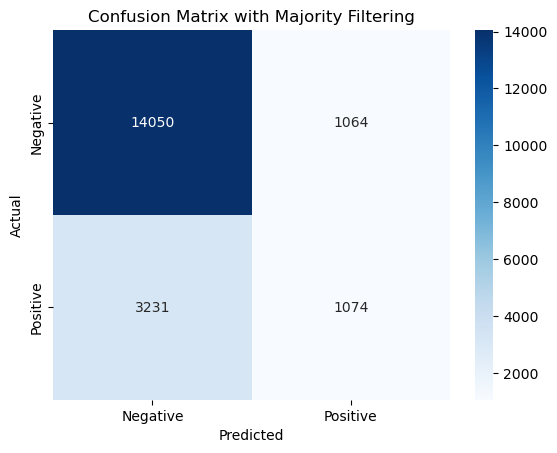

True Positives (TP): 1074
True Negatives (TN): 14050
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     15114
           1       0.50      0.25      0.33      4305

    accuracy                           0.78     19419
   macro avg       0.66      0.59      0.60     19419
weighted avg       0.74      0.78      0.75     19419



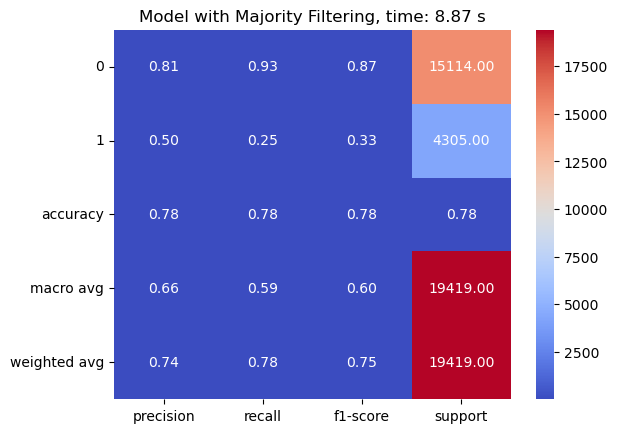

Wall Time: 8.87 seconds
CPU times: total: 10.1 s
Wall time: 10.1 s


In [29]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train your chosen classifier
classifier = RandomForestClassifier()  # Replace with your chosen classifier
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred_prob = classifier.predict_proba(X_test)  # Get class probabilities

# Define the threshold for majority filtering (e.g., 0.5 for majority voting)
threshold = 0.5

# Apply majority filtering to predictions
y_pred_filtered = (y_pred_prob[:, 1] >= threshold).astype(int)  # Use class 1 probabilities

# Evaluate the model with filtered predictions
confusion_mat = confusion_matrix(y_test, y_pred_filtered)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Majority Filtering')
plt.savefig('Confusion_Matrix_Majority_Filtering.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred_filtered)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred_filtered, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_with_Majority_Filtering.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Model with Majority Filtering, time: {wall_time:.2f} s")
plt.savefig('Majority_Filtering_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


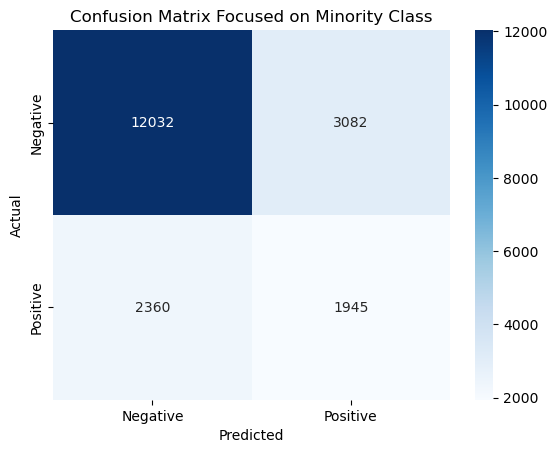

True Positives (TP): 1945
True Negatives (TN): 12032
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     15114
           1       0.39      0.45      0.42      4305

    accuracy                           0.72     19419
   macro avg       0.61      0.62      0.62     19419
weighted avg       0.74      0.72      0.73     19419



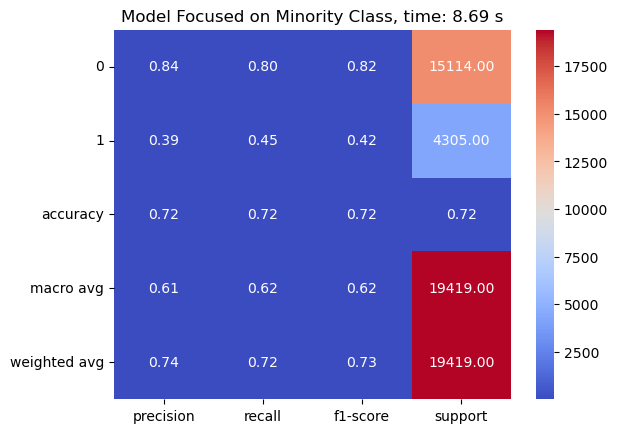

Wall Time: 8.69 seconds
CPU times: total: 9.88 s
Wall time: 9.89 s


In [30]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train your chosen classifier with class_weight='balanced'
classifier = RandomForestClassifier(class_weight='balanced')  # Replace with your chosen classifier
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Focused on Minority Class')
plt.savefig('Confusion_Matrix_Focused_on_Minority_Class.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_Focused_on_Minority_Class.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Model Focused on Minority Class, time: {wall_time:.2f} s")
plt.savefig('Focused_on_Minority_Class_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


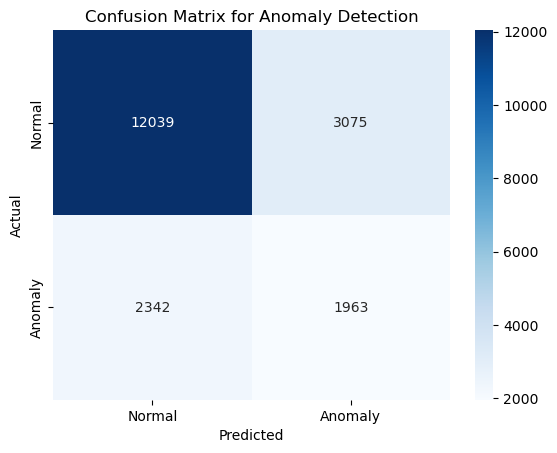

True Positives (TP): 1963
True Negatives (TN): 12039
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     15114
           1       0.39      0.46      0.42      4305

    accuracy                           0.72     19419
   macro avg       0.61      0.63      0.62     19419
weighted avg       0.74      0.72      0.73     19419



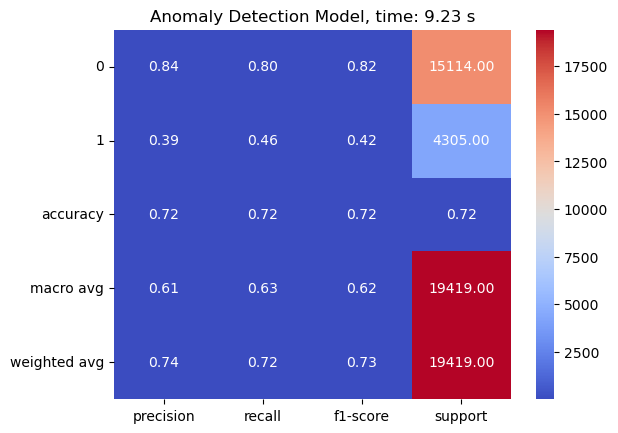

Wall Time: 9.23 seconds
CPU times: total: 10.5 s
Wall time: 10.5 s


In [2]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train your chosen classifier for anomaly detection (e.g., Isolation Forest)
classifier = RandomForestClassifier(class_weight='balanced')  # Replace with your chosen classifier
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Normal', 'Anomaly']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Anomaly Detection')
plt.savefig('Confusion_Matrix_Anomaly_Detection.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_Anomaly_Detection.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Anomaly Detection Model, time: {wall_time:.2f} s")
plt.savefig('Anomaly_Detection_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


In [10]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen classifier
from sklearn.metrics import confusion_matrix, classification_report
import time
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Define the initial pool of labeled data
initial_idx = np.random.choice(range(len(X_train)), size=100, replace=False)
X_initial = X_train.iloc[initial_idx]
y_initial = y_train.iloc[initial_idx]

# Define the query strategy (uncertainty sampling)
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial.values,
    y_training=y_initial.values
)

# Define the number of iterations for active learning
n_iterations = 10  # Adjust as needed

# Active learning loop
for _ in range(n_iterations):
    query_idx, query_instance = learner.query(X_train.values)
    learner.teach(X_train.iloc[query_idx].values, y_train.iloc[query_idx].values)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = learner.predict(X_test.values)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Active Learning')
plt.savefig('Confusion_Matrix_Active_Learning.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_Active_Learning.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Active Learning Model, time: {wall_time:.2f} s")
plt.savefig('Active_Learning_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


ModuleNotFoundError: No module named 'modAL'

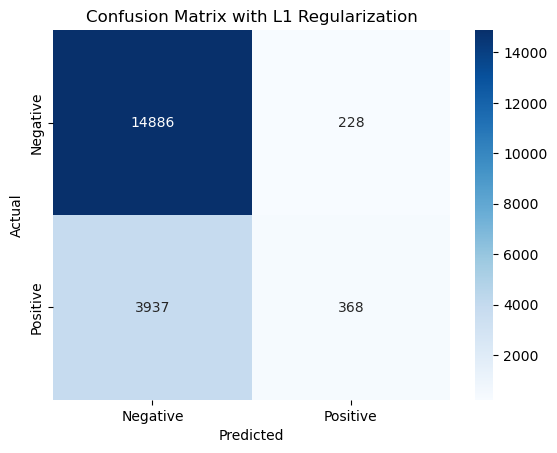

True Positives (TP): 368
True Negatives (TN): 14886
              precision    recall  f1-score   support

           0       0.79      0.98      0.88     15114
           1       0.62      0.09      0.15      4305

    accuracy                           0.79     19419
   macro avg       0.70      0.54      0.51     19419
weighted avg       0.75      0.79      0.72     19419



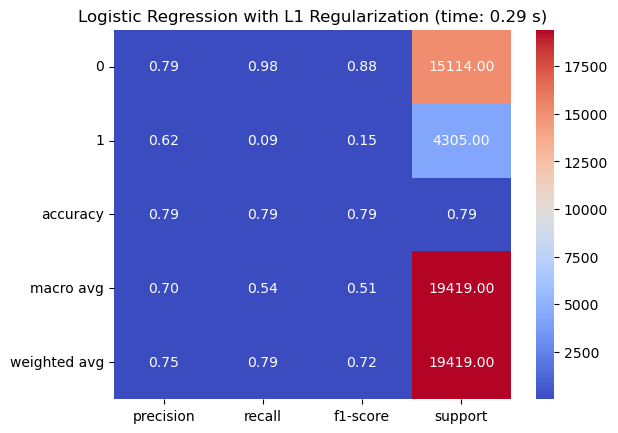

Wall Time: 0.29 seconds
CPU times: total: 1.73 s
Wall time: 1.21 s


In [9]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a logistic regression model with L1 regularization
classifier = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=0)
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with L1 Regularization')
plt.savefig('Confusion_Matrix_L1_Regularization.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_L1_Regularization.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Logistic Regression with L1 Regularization (time: {wall_time:.2f} s)")
plt.savefig('L1_Regularization_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


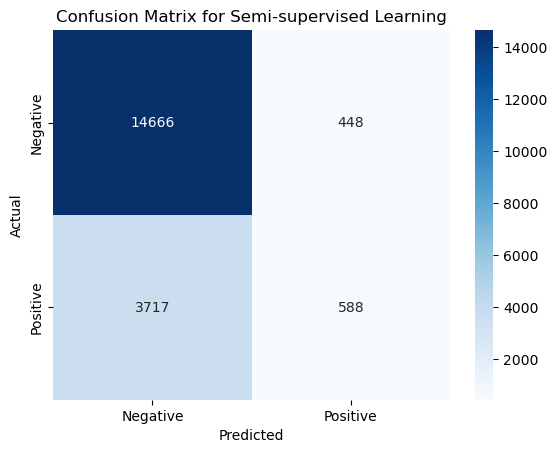

True Positives (TP): 588
True Negatives (TN): 14666
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     15114
           1       0.57      0.14      0.22      4305

    accuracy                           0.79     19419
   macro avg       0.68      0.55      0.55     19419
weighted avg       0.75      0.79      0.73     19419



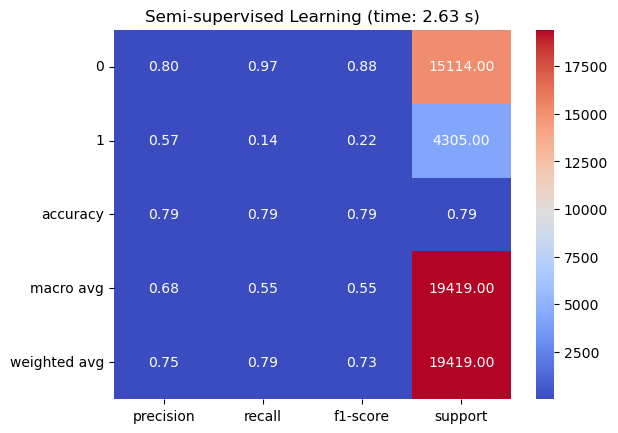

Wall Time: 2.63 seconds
CPU times: total: 4.62 s
Wall time: 3.49 s


In [10]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a logistic regression model on the labeled data
labeled_samples = 1000  # Adjust the number of labeled samples as needed
X_labeled, y_labeled = X_train[:labeled_samples], y_train[:labeled_samples]
classifier = LogisticRegression(solver='liblinear', C=1.0, random_state=0)
classifier.fit(X_labeled, y_labeled)

# Predict the remaining unlabeled data
X_unlabeled, y_unlabeled = X_train[labeled_samples:], y_train[labeled_samples:]
y_pred_unlabeled = classifier.predict(X_unlabeled)

# Combine labeled and predicted labels
X_combined = pd.concat([X_labeled, X_unlabeled], axis=0)
y_combined = pd.concat([y_labeled, pd.Series(y_pred_unlabeled, index=X_unlabeled.index)], axis=0)

# Retrain the classifier on the combined dataset
classifier.fit(X_combined, y_combined)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Semi-supervised Learning')
plt.savefig('Confusion_Matrix_Semi_supervised_Learning.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_Semi_supervised_Learning.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Semi-supervised Learning (time: {wall_time:.2f} s)")
plt.savefig('Semi_supervised_Learning_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


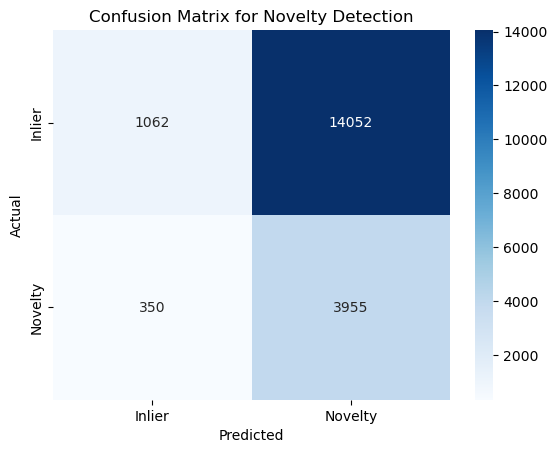

True Positives (TP): 3955
True Negatives (TN): 1062
              precision    recall  f1-score   support

           0       0.75      0.07      0.13     15114
           1       0.22      0.92      0.35      4305

    accuracy                           0.26     19419
   macro avg       0.49      0.49      0.24     19419
weighted avg       0.63      0.26      0.18     19419



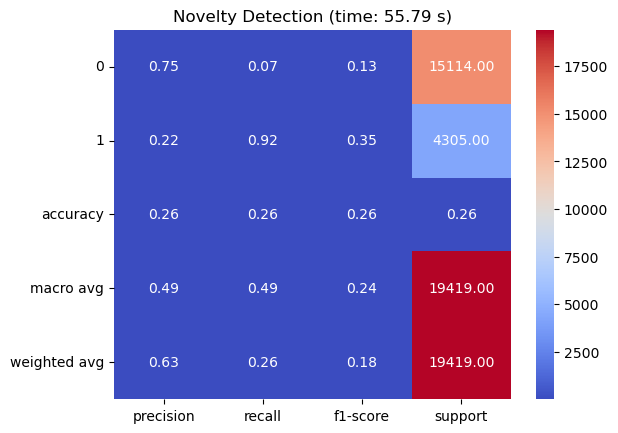

Wall Time: 55.79 seconds
CPU times: total: 1min 3s
Wall time: 1min 4s


In [13]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a One-Class SVM model for novelty detection
nu = 0.05  # Adjust the nu parameter based on your dataset
classifier = OneClassSVM(kernel='rbf', nu=nu)
classifier.fit(X_train)

end_time = time.time()
wall_time = end_time - start_time

# Predict whether each instance in the test set is a novelty
y_pred = classifier.predict(X_test)

# Convert novelty predictions (-1 for novelties, 1 for inliers) to binary labels
y_pred_binary = [1 if label == 1 else 0 for label in y_pred]

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred_binary)

# Visualize the confusion matrix
labels = ['Inlier', 'Novelty']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Novelty Detection')
plt.savefig('Confusion_Matrix_Novelty_Detection.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred_binary)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred_binary, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_Novelty_Detection.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Novelty Detection (time: {wall_time:.2f} s)")
plt.savefig('Novelty_Detection_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


D:\Users\ivan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


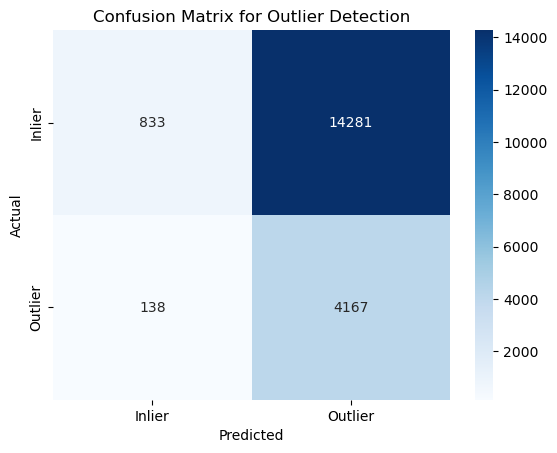

True Positives (TP): 4167
True Negatives (TN): 833
              precision    recall  f1-score   support

           0       0.86      0.06      0.10     15114
           1       0.23      0.97      0.37      4305

    accuracy                           0.26     19419
   macro avg       0.54      0.51      0.23     19419
weighted avg       0.72      0.26      0.16     19419



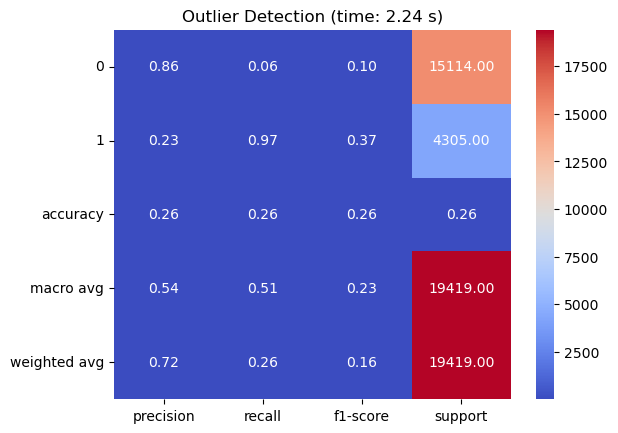

Wall Time: 2.24 seconds
CPU times: total: 3.78 s
Wall time: 3.81 s


In [15]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train an Isolation Forest model for outlier detection
contamination = 0.05  # Adjust the contamination parameter based on your dataset
classifier = IsolationForest(contamination=contamination, random_state=0)
classifier.fit(X_train)

end_time = time.time()
wall_time = end_time - start_time

# Predict whether each instance in the test set is an outlier (-1 for outliers, 1 for inliers)
y_pred = classifier.predict(X_test)

# Convert outlier predictions (-1 for outliers, 1 for inliers) to binary labels
y_pred_binary = [1 if label == 1 else 0 for label in y_pred]

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred_binary)

# Visualize the confusion matrix
labels = ['Inlier', 'Outlier']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Outlier Detection')
plt.savefig('Confusion_Matrix_Outlier_Detection.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred_binary)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred_binary, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_Outlier_Detection.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Outlier Detection (time: {wall_time:.2f} s)")
plt.savefig('Outlier_Detection_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")



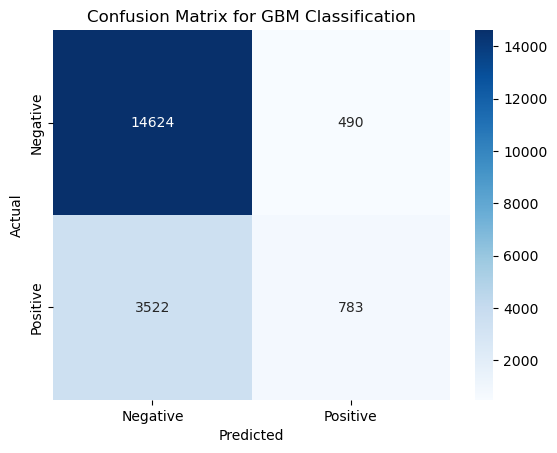

True Positives (TP): 783
True Negatives (TN): 14624
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     15114
           1       0.62      0.18      0.28      4305

    accuracy                           0.79     19419
   macro avg       0.71      0.57      0.58     19419
weighted avg       0.76      0.79      0.75     19419



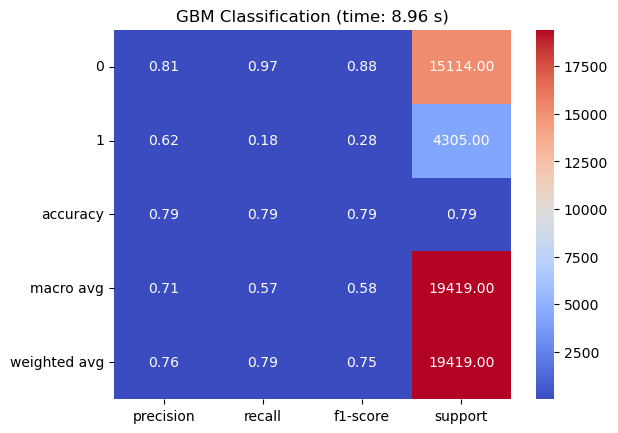

Wall Time: 8.96 seconds
CPU times: total: 9.75 s
Wall time: 9.77 s


In [16]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a Gradient Boosting Classifier
n_estimators = 100  # Adjust the number of estimators as needed
learning_rate = 0.1  # Adjust the learning rate as needed
classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=0)
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GBM Classification')
plt.savefig('Confusion_Matrix_GBM_Classification.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_GBM_Classification.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"GBM Classification (time: {wall_time:.2f} s)")
plt.savefig('GBM_Classification_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


In [ ]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a Support Vector Machine Classifier
classifier = SVC(kernel='linear', C=1.0, random_state=0)  # You can adjust the kernel and C parameter as needed
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Classification')
plt.savefig('Confusion_Matrix_SVM_Classification.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_SVM_Classification.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"SVM Classification (time: {wall_time:.2f} s)")
plt.savefig('SVM_Classification_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


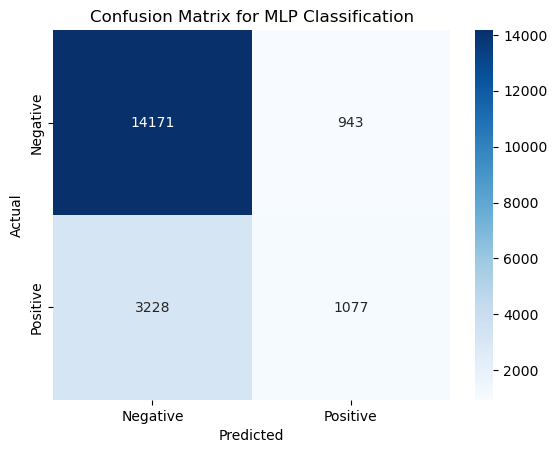

True Positives (TP): 1077
True Negatives (TN): 14171
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     15114
           1       0.53      0.25      0.34      4305

    accuracy                           0.79     19419
   macro avg       0.67      0.59      0.61     19419
weighted avg       0.75      0.79      0.75     19419



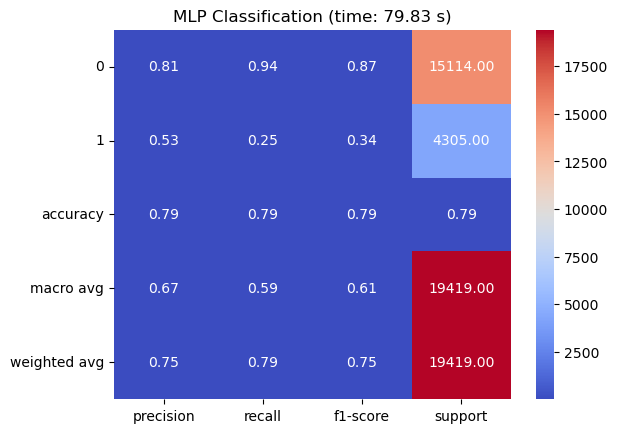

Wall Time: 79.83 seconds
CPU times: total: 5min 19s
Wall time: 1min 23s


In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train an MLP Classifier
hidden_layer_sizes = (100, 50)  # Define the structure of hidden layers as needed
classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000, random_state=0)
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for MLP Classification')
plt.savefig('Confusion_Matrix_MLP_Classification.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_MLP_Classification.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"MLP Classification (time: {wall_time:.2f} s)")
plt.savefig('MLP_Classification_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


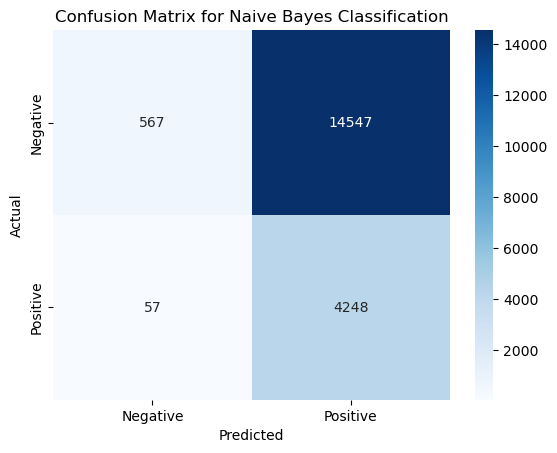

True Positives (TP): 4248
True Negatives (TN): 567
              precision    recall  f1-score   support

           0       0.91      0.04      0.07     15114
           1       0.23      0.99      0.37      4305

    accuracy                           0.25     19419
   macro avg       0.57      0.51      0.22     19419
weighted avg       0.76      0.25      0.14     19419



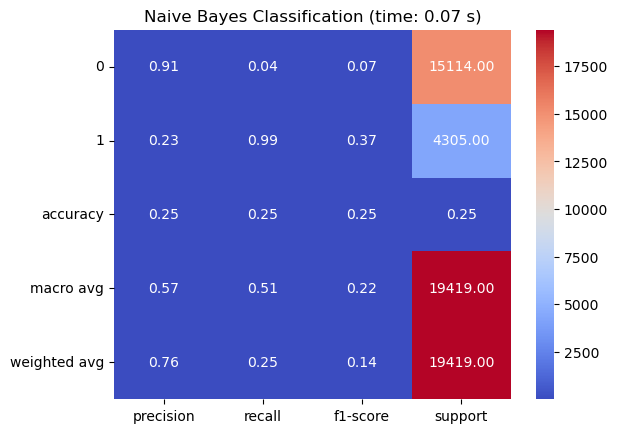

Wall Time: 0.07 seconds
CPU times: total: 906 ms
Wall time: 905 ms


In [2]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Use Gaussian Naive Bayes for continuous features
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a Gaussian Naive Bayes Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classification')
plt.savefig('Confusion_Matrix_Naive_Bayes_Classification.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_Naive_Bayes_Classification.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Naive Bayes Classification (time: {wall_time:.2f} s)")
plt.savefig('Naive_Bayes_Classification_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


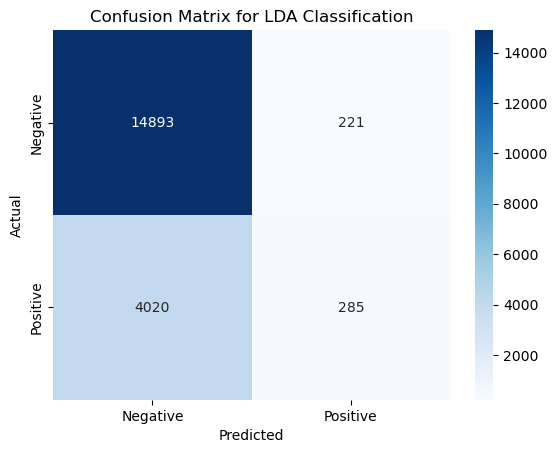

True Positives (TP): 285
True Negatives (TN): 14893
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     15114
           1       0.56      0.07      0.12      4305

    accuracy                           0.78     19419
   macro avg       0.68      0.53      0.50     19419
weighted avg       0.74      0.78      0.71     19419



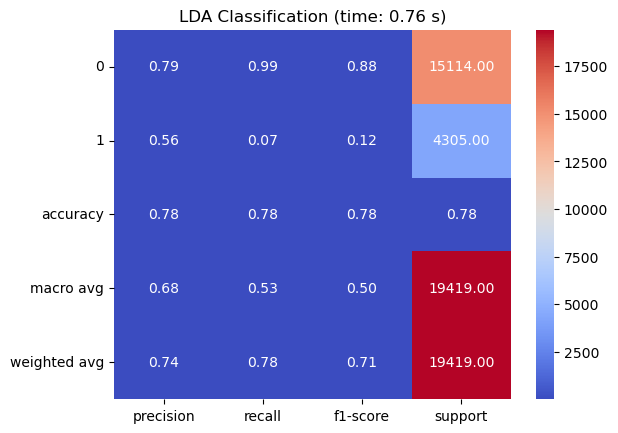

Wall Time: 0.76 seconds
CPU times: total: 2.64 s
Wall time: 2.04 s


In [3]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a Linear Discriminant Analysis Classifier
classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LDA Classification')
plt.savefig('Confusion_Matrix_LDA_Classification.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_LDA_Classification.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"LDA Classification (time: {wall_time:.2f} s)")
plt.savefig('LDA_Classification_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


D:\Users\ivan\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


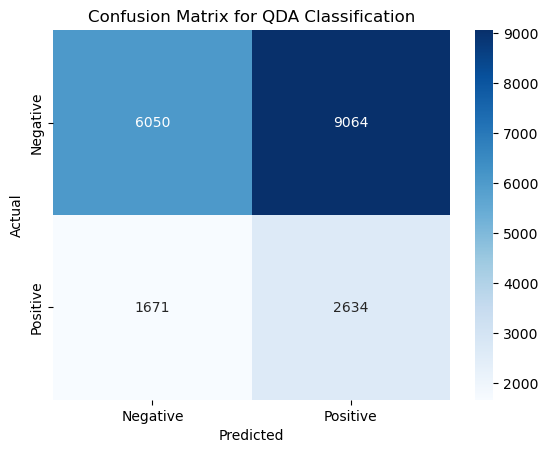

True Positives (TP): 2634
True Negatives (TN): 6050
              precision    recall  f1-score   support

           0       0.78      0.40      0.53     15114
           1       0.23      0.61      0.33      4305

    accuracy                           0.45     19419
   macro avg       0.50      0.51      0.43     19419
weighted avg       0.66      0.45      0.49     19419



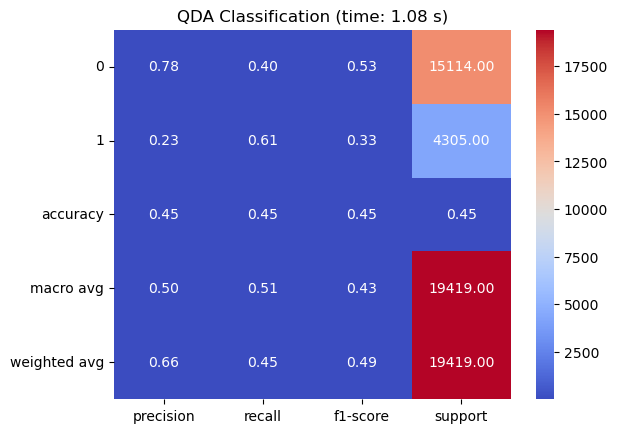

Wall Time: 1.08 seconds
CPU times: total: 2.7 s
Wall time: 2.62 s


In [5]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Train a Quadratic Discriminant Analysis Classifier
classifier = QuadraticDiscriminantAnalysis()
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for QDA Classification')
plt.savefig('Confusion_Matrix_QDA_Classification.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_QDA_Classification.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"QDA Classification (time: {wall_time:.2f} s)")
plt.savefig('QDA_Classification_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


In [4]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import confusion_matrix, classification_report
import time

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Calculate wall time
start_time = time.time()

# Create a GaussianProcessClassifier with an RBF kernel
kernel = 1.0 * RBF()
classifier = GaussianProcessClassifier(kernel=kernel, random_state=0)
classifier.fit(X_train, y_train)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred, _ = classifier.predict_proba(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GaussianProcess Classification')
plt.savefig('Confusion_Matrix_GaussianProcess_Classification.png')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_GaussianProcess_Classification.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"GaussianProcess Classification (time: {wall_time:.2f} s)")
plt.savefig('GaussianProcess_Classification_report_heatmap.png')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


MemoryError: Unable to allocate 45.0 GiB for an array with shape (77675, 77675) and data type float64

Epoch 1/10
2428/2428 - 4s - loss: 0.4727 - accuracy: 0.7926 - 4s/epoch - 2ms/step
Epoch 2/10
2428/2428 - 3s - loss: 0.4619 - accuracy: 0.7973 - 3s/epoch - 1ms/step
Epoch 3/10
2428/2428 - 3s - loss: 0.4596 - accuracy: 0.7974 - 3s/epoch - 1ms/step
Epoch 4/10
2428/2428 - 3s - loss: 0.4583 - accuracy: 0.7986 - 3s/epoch - 1ms/step
Epoch 5/10
2428/2428 - 3s - loss: 0.4574 - accuracy: 0.7988 - 3s/epoch - 1ms/step
Epoch 6/10
2428/2428 - 3s - loss: 0.4568 - accuracy: 0.7991 - 3s/epoch - 1ms/step
Epoch 7/10
2428/2428 - 3s - loss: 0.4557 - accuracy: 0.7989 - 3s/epoch - 1ms/step
Epoch 8/10
2428/2428 - 3s - loss: 0.4556 - accuracy: 0.7989 - 3s/epoch - 1ms/step
Epoch 9/10
2428/2428 - 3s - loss: 0.4551 - accuracy: 0.7994 - 3s/epoch - 1ms/step
Epoch 10/10
2428/2428 - 3s - loss: 0.4541 - accuracy: 0.8001 - 3s/epoch - 1ms/step
607/607 [==============================] - 1s 1ms/step


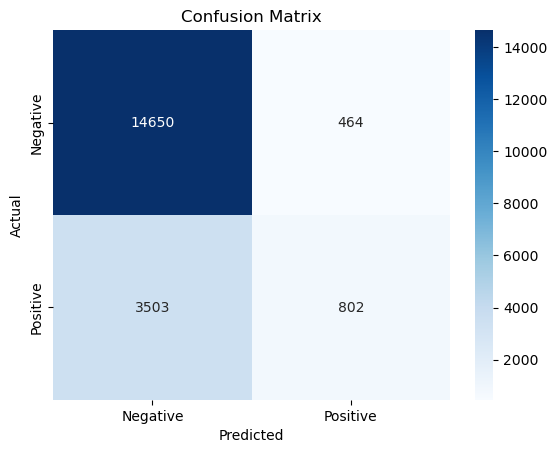

True Positives (TP): 802
True Negatives (TN): 14650
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     15114
           1       0.63      0.19      0.29      4305

    accuracy                           0.80     19419
   macro avg       0.72      0.58      0.58     19419
weighted avg       0.77      0.80      0.75     19419

607/607 [==============================] - 1s 989us/step


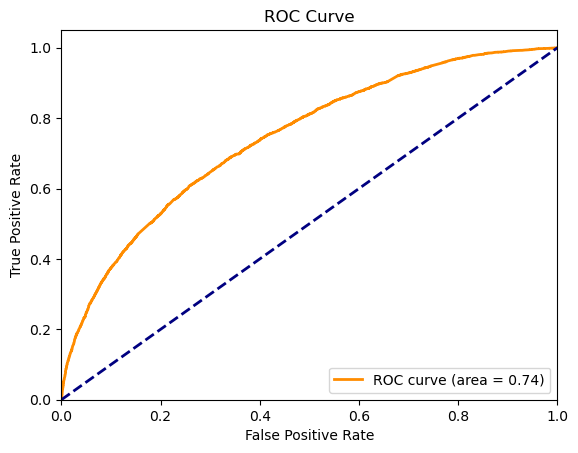

Wall Time: 30.19 seconds


In [7]:
# Установите TensorFlow, если он еще не установлен
# !pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import time
import tensorflow as tf
from tensorflow import keras

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate wall time
start_time = time.time()

# Build a deep neural network (DNN) model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

end_time = time.time()
wall_time = end_time - start_time

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))

# Save classification report as a .csv file
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('dnn_classification_report.csv')

# ROC Curve
y_score = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print wall time
print(f"Wall Time: {wall_time:.2f} seconds")


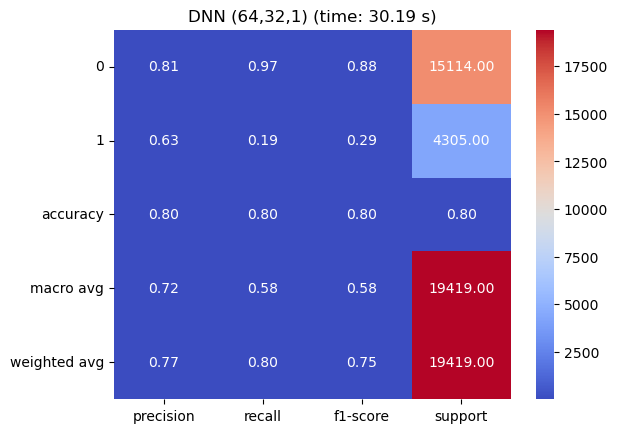

In [8]:
classification_rep_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
classification_rep_df.to_csv('classification_report_dnn.csv')

# Convert classification report to a heatmap
sns.heatmap(classification_rep_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"DNN (64,32,1) (time: {wall_time:.2f} s)")
plt.savefig('DNN_report_heatmap.png')
plt.show()

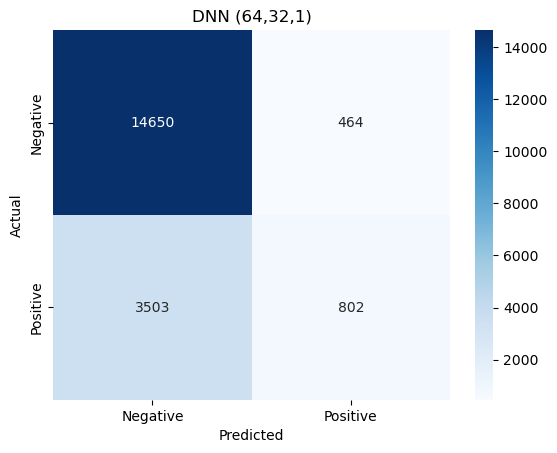

In [9]:
# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DNN (64,32,1)')
plt.savefig('Confusion_Matrix_DNN.png')
plt.show()